# Milestone 1: International Hotel Booking Analytics
## Predicting Hotel Country Groups using Machine Learning (ML)

**Team Number:** [90]  
---

## Project Overview

**Goal:** Build a multi-class classification model to predict the country group of hotels based on user demographics, hotel characteristics, and review scores.

**Dataset:**
- 50,000 reviews across 25 hotels in 25 countries
- 2,000 unique users with demographic information
- 11 target country groups

**Deliverables:**
1. A cleaned dataset after the feature engineering step.
2. Data engineering insights, including:
 - The best city for each traveller type.
 - The top three countries with the best value-for-money scores per traveller age group.

3. A trained classification model (statistical ML or shallow FFNN).
4. Model interpretation and explainability through XAI techniques (SHAP and LIME).
5. An inference function.

---

# Section 1: Data Cleaning

## 1.1 - Importing Libraries

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## 1.2 - Loading and Assessing Datasets

### Hotels Dataset

#### Loading the Hotels Dataset


In [67]:
df_hotels = pd.read_csv('../Dataset [Original]/hotels.csv')
df_hotels.head()

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,United States,5,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0
1,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,9.4,9.0,7.9
2,3,L'Étoile Palace,Paris,France,5,48.8566,2.3522,8.8,9.4,8.7,9.6,9.3,8.1
3,4,Kyo-to Grand,Tokyo,Japan,5,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.2769,55.2962,9.3,9.5,9.6,8.9,9.4,8.5


#### Renaming Hotel Columns --> Hotel_ + Original Column name

In [68]:
df_hotels.columns = [
    col if col == 'hotel_id' or col == 'hotel_name' else 'hotel_' + col
    for col in df_hotels.columns
]


#### Checking for Null Values

In [69]:
df_hotels.isnull().sum()

hotel_id                      0
hotel_name                    0
hotel_city                    0
hotel_country                 0
hotel_star_rating             0
hotel_lat                     0
hotel_lon                     0
hotel_cleanliness_base        0
hotel_comfort_base            0
hotel_facilities_base         0
hotel_location_base           0
hotel_staff_base              0
hotel_value_for_money_base    0
dtype: int64

#### Checking for Duplicated Values

In [70]:
df_hotels.duplicated().sum()

np.int64(0)

### Reviews Dataset

In [71]:
df_reviews = pd.read_csv('../Dataset [Original]/reviews.csv')
df_reviews.head()

,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
0,1,1600,1,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,8.7,Practice reduce young our because machine. Rec...
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,8.6,Test cover traditional black. Process tell Mr ...
2,3,186,18,2023-12-18,8.8,9.7,8.8,8.3,8.7,8.1,8.6,Friend million student social study yeah. Grow...
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,8.3,Huge girl already remain truth behind card. Ap...
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,8.9,Cover feeling call community serve television ...


#### Renaming Reviews Columns --> Review_ + Original Column name

In [72]:
df_reviews.columns = [
    col if col == 'review_id'
           or col == 'user_id'
           or col == 'hotel_id'
           or col == 'review_date'
           or col == 'review_text'
        else 'review_' + col
    for col in df_reviews.columns
]


#### Checking for Null Values

In [73]:
df_reviews.isnull().sum()

review_id                       0
user_id                         0
hotel_id                        0
review_date                     0
review_score_overall            0
review_score_cleanliness        0
review_score_comfort            0
review_score_facilities         0
review_score_location           0
review_score_staff              0
review_score_value_for_money    0
review_text                     0
dtype: int64

#### Checking for Duplicated Values

In [74]:
df_reviews.duplicated().sum()

np.int64(0)

### Users Dataset

In [75]:
df_users = pd.read_csv('../Dataset [Original]/users.csv')
df_users.head() # This shows the 5 rows

,user_id,user_gender,country,age_group,traveller_type,join_date
0,1,Female,United Kingdom,35-44,Solo,2024-09-29
1,2,Male,United Kingdom,25-34,Solo,2023-11-29
2,3,Female,Mexico,25-34,Family,2022-04-03
3,4,Male,India,35-44,Family,2023-12-02
4,5,Other,Japan,25-34,Solo,2021-12-18


#### Renaming Users Columns --> User_ + Original Column name

In [76]:
df_users.columns = [
    col if col == 'user_id'
        or col == 'user_gender'
        else 'user_' + col
    for col in df_users.columns
]


#### Checking for Null Values

In [77]:
df_users.isnull().sum()

user_id                0
user_gender            0
user_country           0
user_age_group         0
user_traveller_type    0
user_join_date         0
dtype: int64

#### Checking for Duplicated Values

In [78]:
df_users.duplicated().sum()

np.int64(0)

## 1.3 - Merging Datasets

In [79]:
# Merge reviews with users on user_id
df_merged = pd.merge(df_reviews, df_users, on='user_id', how='left')

# Merge the result with hotels on hotel_id
df_merged = pd.merge(df_merged, df_hotels, on='hotel_id', how='left')

df_merged.head()

,review_id,user_id,hotel_id,review_date,review_score_overall,review_score_cleanliness,review_score_comfort,review_score_facilities,review_score_location,review_score_staff,...,hotel_country,hotel_star_rating,hotel_lat,hotel_lon,hotel_cleanliness_base,hotel_comfort_base,hotel_facilities_base,hotel_location_base,hotel_staff_base,hotel_value_for_money_base
0,1,1600,1,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,...,United States,5,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,...,Japan,5,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2
2,3,186,18,2023-12-18,8.8,9.7,8.8,8.3,8.7,8.1,...,Egypt,5,30.0444,31.2357,8.8,8.7,8.6,9.1,8.7,8.4
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,...,Spain,5,41.3851,2.1734,9.2,9.1,8.9,9.7,9.0,8.8
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,...,Russia,5,55.7558,37.6173,9.1,9.3,9.0,9.0,9.1,8.6


In [80]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   review_id                     50000 non-null  int64  
 1   user_id                       50000 non-null  int64  
 2   hotel_id                      50000 non-null  int64  
 3   review_date                   50000 non-null  object 
 4   review_score_overall          50000 non-null  float64
 5   review_score_cleanliness      50000 non-null  float64
 6   review_score_comfort          50000 non-null  float64
 7   review_score_facilities       50000 non-null  float64
 8   review_score_location         50000 non-null  float64
 9   review_score_staff            50000 non-null  float64
 10  review_score_value_for_money  50000 non-null  float64
 11  review_text                   50000 non-null  object 
 12  user_gender                   50000 non-null  object 
 13  u

## 1.4 - Dropping Unnecessary Columns

In [81]:
# Drop unnecessary columns that do not contribute to the predictive modeling task
# These columns are either textual, identifiers or dates that add no generalizable value

df_merged.drop(
    columns=[
        'review_date',
        'review_text',
        'user_join_date',
        'hotel_name'
    ],
    inplace=True
)

df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   review_id                     50000 non-null  int64  
 1   user_id                       50000 non-null  int64  
 2   hotel_id                      50000 non-null  int64  
 3   review_score_overall          50000 non-null  float64
 4   review_score_cleanliness      50000 non-null  float64
 5   review_score_comfort          50000 non-null  float64
 6   review_score_facilities       50000 non-null  float64
 7   review_score_location         50000 non-null  float64
 8   review_score_staff            50000 non-null  float64
 9   review_score_value_for_money  50000 non-null  float64
 10  user_gender                   50000 non-null  object 
 11  user_country                  50000 non-null  object 
 12  user_age_group                50000 non-null  object 
 13  u

---

## 1.5 - Cleaned Dataset Summary

All datasets have been successfully loaded, cleaned, and merged:
- No null values found.
- No duplicate records.
- Columns renamed with prefixes for clarity.
- Unnecessary columns were dropped.
- Final merged dataset contains 50,000 reviews with complete hotel characteristics and user information


# Section 2: Data Engineering Questions

Using the cleaned and merged dataset, we analyze and visualize the following:

1. **Best City for Each Trave;ler Type**
   - Identify the city with the highest average review score for each traveler type.

2. **Top 3 Countries by Value-for-Money per Age Group**
   - Find the top 3 countries with the highest value-for-money score per traveller’s age group.

## 2.1 - Best City for Each Traveller Type

### Heatmap Analysis

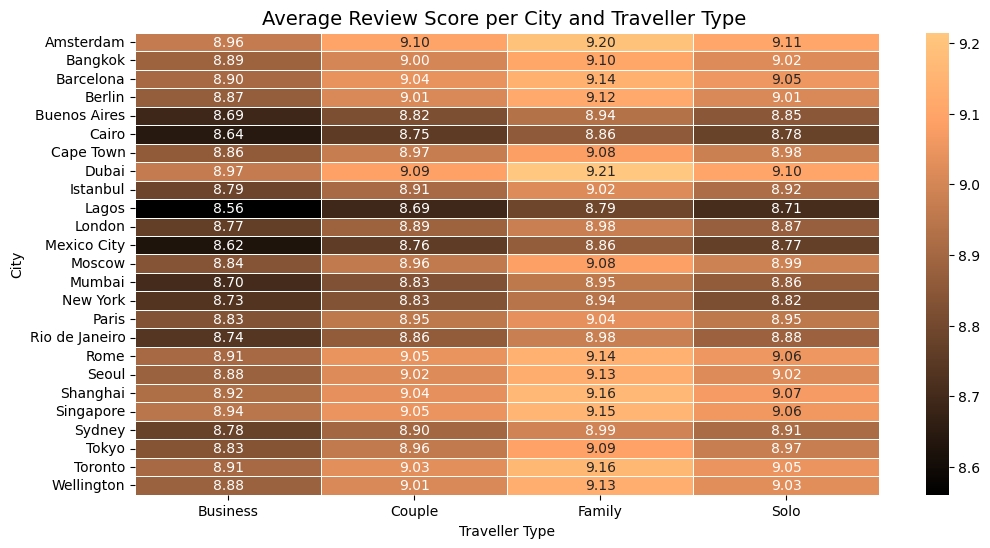

In [82]:
pivot = pd.pivot_table(
        df_merged,
        index="hotel_city",
        columns="user_traveller_type",
        values="review_score_overall",
        aggfunc="mean"
    )

plt.figure(figsize = (12,6))


sns.heatmap(pivot, annot=True, cmap="copper", fmt=".2f", linewidths=0.5)

# Extra GUI enhancements
plt.title("Average Review Score per City and Traveller Type ", fontsize=14)
plt.xlabel("Traveller Type")
plt.ylabel("City")
plt.show()


### Insights

Using the heatmap visualization, we can observe clear differences in average review scores across traveller types and cities:

- **Business travellers:** Dubai achieved the highest average score of **8.97**.
- **Couples:** Amsterdam recorded the highest average score of **9.10**.
- **Families:** Dubai again stood out with an average score of **9.21**.
- **Solo travellers:** Amsterdam had the highest average score of **9.11**.

## 2.2 - Top 3 Countries by Value-for-Money per Age Group

### Heatmap Analysis

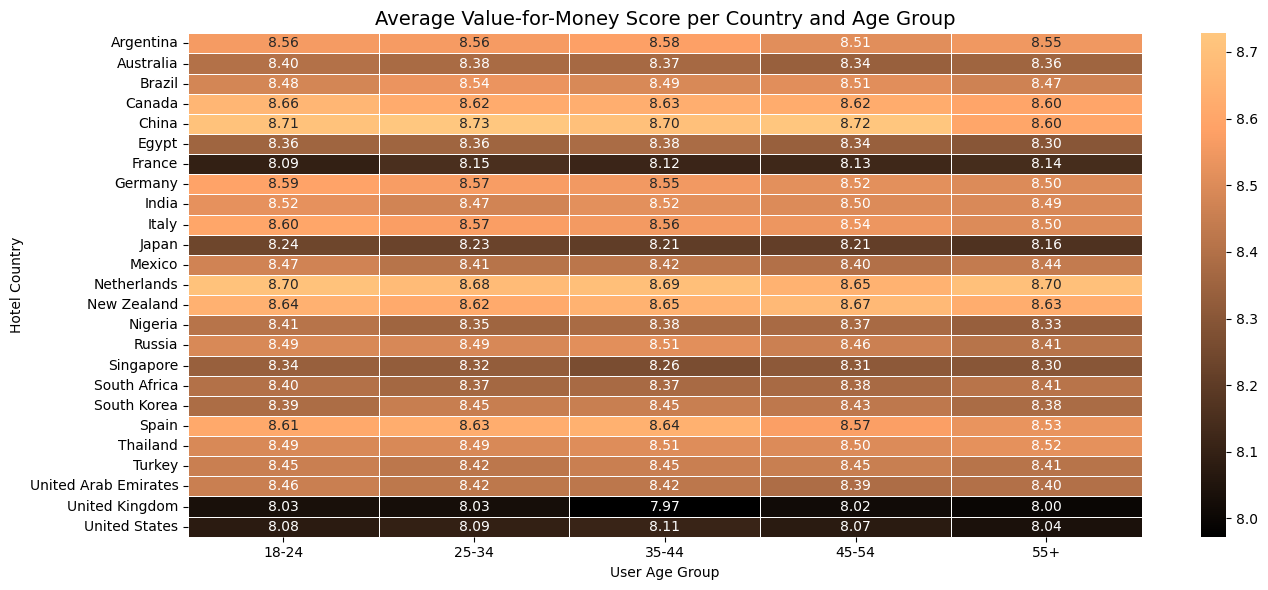

In [83]:
pivot = pd.pivot_table(
    df_merged,
    index="hotel_country",
    columns="user_age_group",
    values="review_score_value_for_money",
    aggfunc="mean"
)

plt.figure(figsize=(14, 6))

sns.heatmap(
    pivot,
    annot=True,
    cmap="copper",
    fmt=".2f",
    linewidths=0.5
)

# Extra GUI Interface
plt.title("Average Value-for-Money Score per Country and Age Group", fontsize=14)
plt.xlabel("User Age Group")
plt.ylabel("Hotel Country")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Insights

Top 3 countries by value-for-money score for each age group:

- **18–24:** China (8.71), Netherlands (8.70), Canada (8.66)
- **25–34:** China (8.73), Netherlands (8.68), Spain (8.63)
- **35–44:** China (8.70), Netherlands (8.69), New Zealand (8.65)
- **45–54:** China (8.72), New Zealand (8.67), Netherlands (8.65)
- **55+:** Netherlands (8.70), New Zealand (8.63), China (8.60)

---

# Section 3: Exploratory Data Analysis (EDA)

**Objective:** Understand data distributions, correlations, and patterns to inform feature engineering and modeling decisions.

---

## 3.1 - Target Variable Analysis

### Create Target Variable

We group the 25 countries into 11 geographic regions (country groups) to create our classification target.

In [84]:
# Create a mapping dictionary from country names to geographic regions (country groups)
# This groups the 25 countries into 11 regions (country groups) for classification
country_to_group = {
    # North America
    'United States': 'North_America',
    'Canada': 'North_America',

    # Western Europe
    'Germany': 'Western_Europe',
    'France': 'Western_Europe',
    'United Kingdom': 'Western_Europe',
    'Netherlands': 'Western_Europe',
    'Spain': 'Western_Europe',
    'Italy': 'Western_Europe',

    # Eastern Europe
    'Russia': 'Eastern_Europe',

    # East Asia
    'China': 'East_Asia',
    'Japan': 'East_Asia',
    'South Korea': 'East_Asia',

    # Southeast Asia
    'Thailand': 'Southeast_Asia',
    'Singapore': 'Southeast_Asia',

    # Middle East
    'United Arab Emirates': 'Middle_East',
    'Turkey': 'Middle_East',

    # Africa
    'Egypt': 'Africa',
    'Nigeria': 'Africa',
    'South Africa': 'Africa',

    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',

    # South America
    'Brazil': 'South_America',
    'Argentina': 'South_America',

    # South Asia
    'India': 'South_Asia',

    # North America (Mexico separate due to different characteristics)
    'Mexico': 'North_America_Mexico'
}

# Apply the mapping to create our target variable
df_merged['country_group'] = df_merged['hotel_country'].map(country_to_group)

df_merged.head()


,review_id,user_id,hotel_id,review_score_overall,review_score_cleanliness,review_score_comfort,review_score_facilities,review_score_location,review_score_staff,review_score_value_for_money,...,hotel_star_rating,hotel_lat,hotel_lon,hotel_cleanliness_base,hotel_comfort_base,hotel_facilities_base,hotel_location_base,hotel_staff_base,hotel_value_for_money_base,country_group
0,1,1600,1,8.7,8.6,8.7,8.5,9.0,8.8,8.7,...,5,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0,North_America
1,2,432,4,9.1,10.0,9.1,9.0,8.6,9.4,8.6,...,5,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2,East_Asia
2,3,186,18,8.8,9.7,8.8,8.3,8.7,8.1,8.6,...,5,30.0444,31.2357,8.8,8.7,8.6,9.1,8.7,8.4,Africa
3,4,1403,19,8.9,9.0,8.8,8.5,9.6,9.1,8.3,...,5,41.3851,2.1734,9.2,9.1,8.9,9.7,9.0,8.8,Western_Europe
4,5,1723,17,9.1,8.9,9.5,9.3,8.3,9.4,8.9,...,5,55.7558,37.6173,9.1,9.3,9.0,9.0,9.1,8.6,Eastern_Europe


In [85]:
# Count how many reviews belong to each country group
print("Distribution of reviews across country groups:")
print(df_merged['country_group'].value_counts().sort_index())

Distribution of reviews across country groups:
country_group
Africa                   6132
East_Asia                6082
Eastern_Europe           1970
Middle_East              3983
North_America            3962
North_America_Mexico     2004
Oceania                  4014
South_America            3918
South_Asia               1989
Southeast_Asia           4070
Western_Europe          11876
Name: count, dtype: int64


### Visualize Target Distribution

Now let's visualize the distribution to better understand class imbalance.

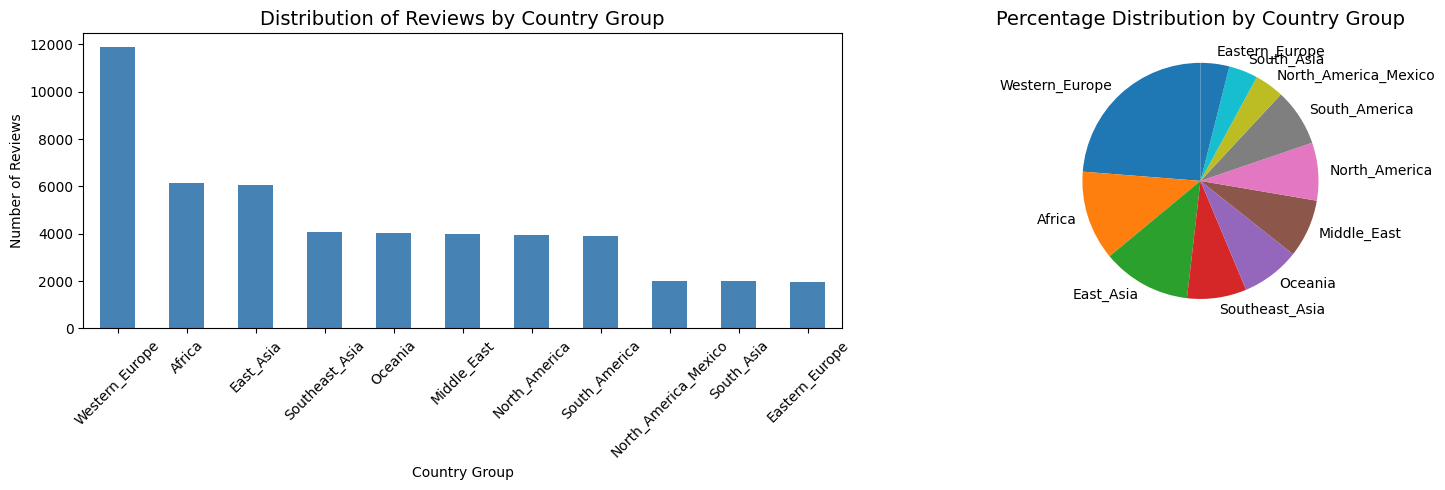


Class Imbalance Analysis:
Largest class: Western_Europe with 11876 samples
Smallest class: Eastern_Europe with 1970 samples
Imbalance ratio: 6.03:1

This means the largest class has 6.03x more samples than the smallest class.


In [86]:
# Get the distribution sorted by count (descending)
target_dist = df_merged['country_group'].value_counts().sort_values(ascending=False)

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# First plot: Bar chart showing counts
target_dist.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Distribution of Reviews by Country Group', fontsize=14)
axes[0].set_xlabel('Country Group')
axes[0].set_ylabel('Number of Reviews')
axes[0].tick_params(axis='x', rotation=45)

# Second plot: Pie chart showing percentages
axes[1].pie(target_dist, labels=target_dist.index, startangle=90)
axes[1].set_title('Percentage Distribution by Country Group', fontsize=14)

plt.tight_layout()
plt.show()

# Calculate and display class imbalance statistics
largest_class = target_dist.idxmax()
smallest_class = target_dist.idxmin()
imbalance_ratio = target_dist.max() / target_dist.min()

print(f"\nClass Imbalance Analysis:")
print(f"Largest class: {largest_class} with {target_dist.max()} samples")
print(f"Smallest class: {smallest_class} with {target_dist.min()} samples")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")
print(f"\nThis means the largest class has {imbalance_ratio:.2f}x more samples than the smallest class.")

---

## 3.2 - Numerical Features Analysis

Let's analyze the distribution and statistics of numerical features to understand their behavior.

In [87]:
# Identify all numerical columns in the dataset
numerical_cols = df_merged.select_dtypes(include=[np.number]).columns.tolist()

print(f"Total numerical features: {len(numerical_cols)}\n")
print("List of numerical features:")
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i}. {col}")

print("\n")
print("Statistical Summary of Numerical Features:")
print("\n")
df_merged[numerical_cols].describe()

Total numerical features: 19

List of numerical features:
  1. review_id
  2. user_id
  3. hotel_id
  4. review_score_overall
  5. review_score_cleanliness
  6. review_score_comfort
  7. review_score_facilities
  8. review_score_location
  9. review_score_staff
  10. review_score_value_for_money
  11. hotel_star_rating
  12. hotel_lat
  13. hotel_lon
  14. hotel_cleanliness_base
  15. hotel_comfort_base
  16. hotel_facilities_base
  17. hotel_location_base
  18. hotel_staff_base
  19. hotel_value_for_money_base


Statistical Summary of Numerical Features:




,review_id,user_id,hotel_id,review_score_overall,review_score_cleanliness,review_score_comfort,review_score_facilities,review_score_location,review_score_staff,review_score_value_for_money,hotel_star_rating,hotel_lat,hotel_lon,hotel_cleanliness_base,hotel_comfort_base,hotel_facilities_base,hotel_location_base,hotel_staff_base,hotel_value_for_money_base
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,1005.567540,13.051100,8.943460,9.052558,9.024404,8.743062,9.176410,8.972076,8.434540,5.0,20.882112,34.468497,9.091592,9.063918,8.917196,9.270406,9.015730,8.513232
std,14433.901067,576.711855,7.203808,0.180878,0.504296,0.423927,0.498320,0.421086,0.397775,0.529321,0.0,30.437484,73.576721,0.226334,0.234129,0.286064,0.347649,0.236695,0.258259
min,1.000000,1.000000,1.000000,8.200000,7.700000,7.900000,7.600000,7.900000,7.900000,6.800000,5.0,-41.286500,-99.133200,8.700000,8.600000,8.500000,8.500000,8.600000,7.900000
25%,12500.750000,507.000000,7.000000,8.800000,8.700000,8.700000,8.400000,8.900000,8.700000,8.100000,5.0,6.524400,2.173400,8.900000,8.900000,8.700000,9.000000,8.800000,8.400000
50%,25000.500000,1010.000000,13.000000,8.900000,9.100000,9.000000,8.700000,9.200000,9.000000,8.500000,5.0,31.230400,18.424100,9.100000,9.100000,8.900000,9.300000,9.000000,8.500000
75%,37500.250000,1504.000000,19.000000,9.100000,9.400000,9.300000,9.100000,9.500000,9.200000,8.800000,5.0,41.902800,100.501800,9.300000,9.200000,9.100000,9.600000,9.200000,8.700000
max,50000.000000,2000.000000,25.000000,9.600000,10.000000,10.000000,10.000000,10.000000,10.000000,9.700000,5.0,55.755800,174.776200,9.600000,9.500000,9.600000,9.800000,9.500000,8.900000


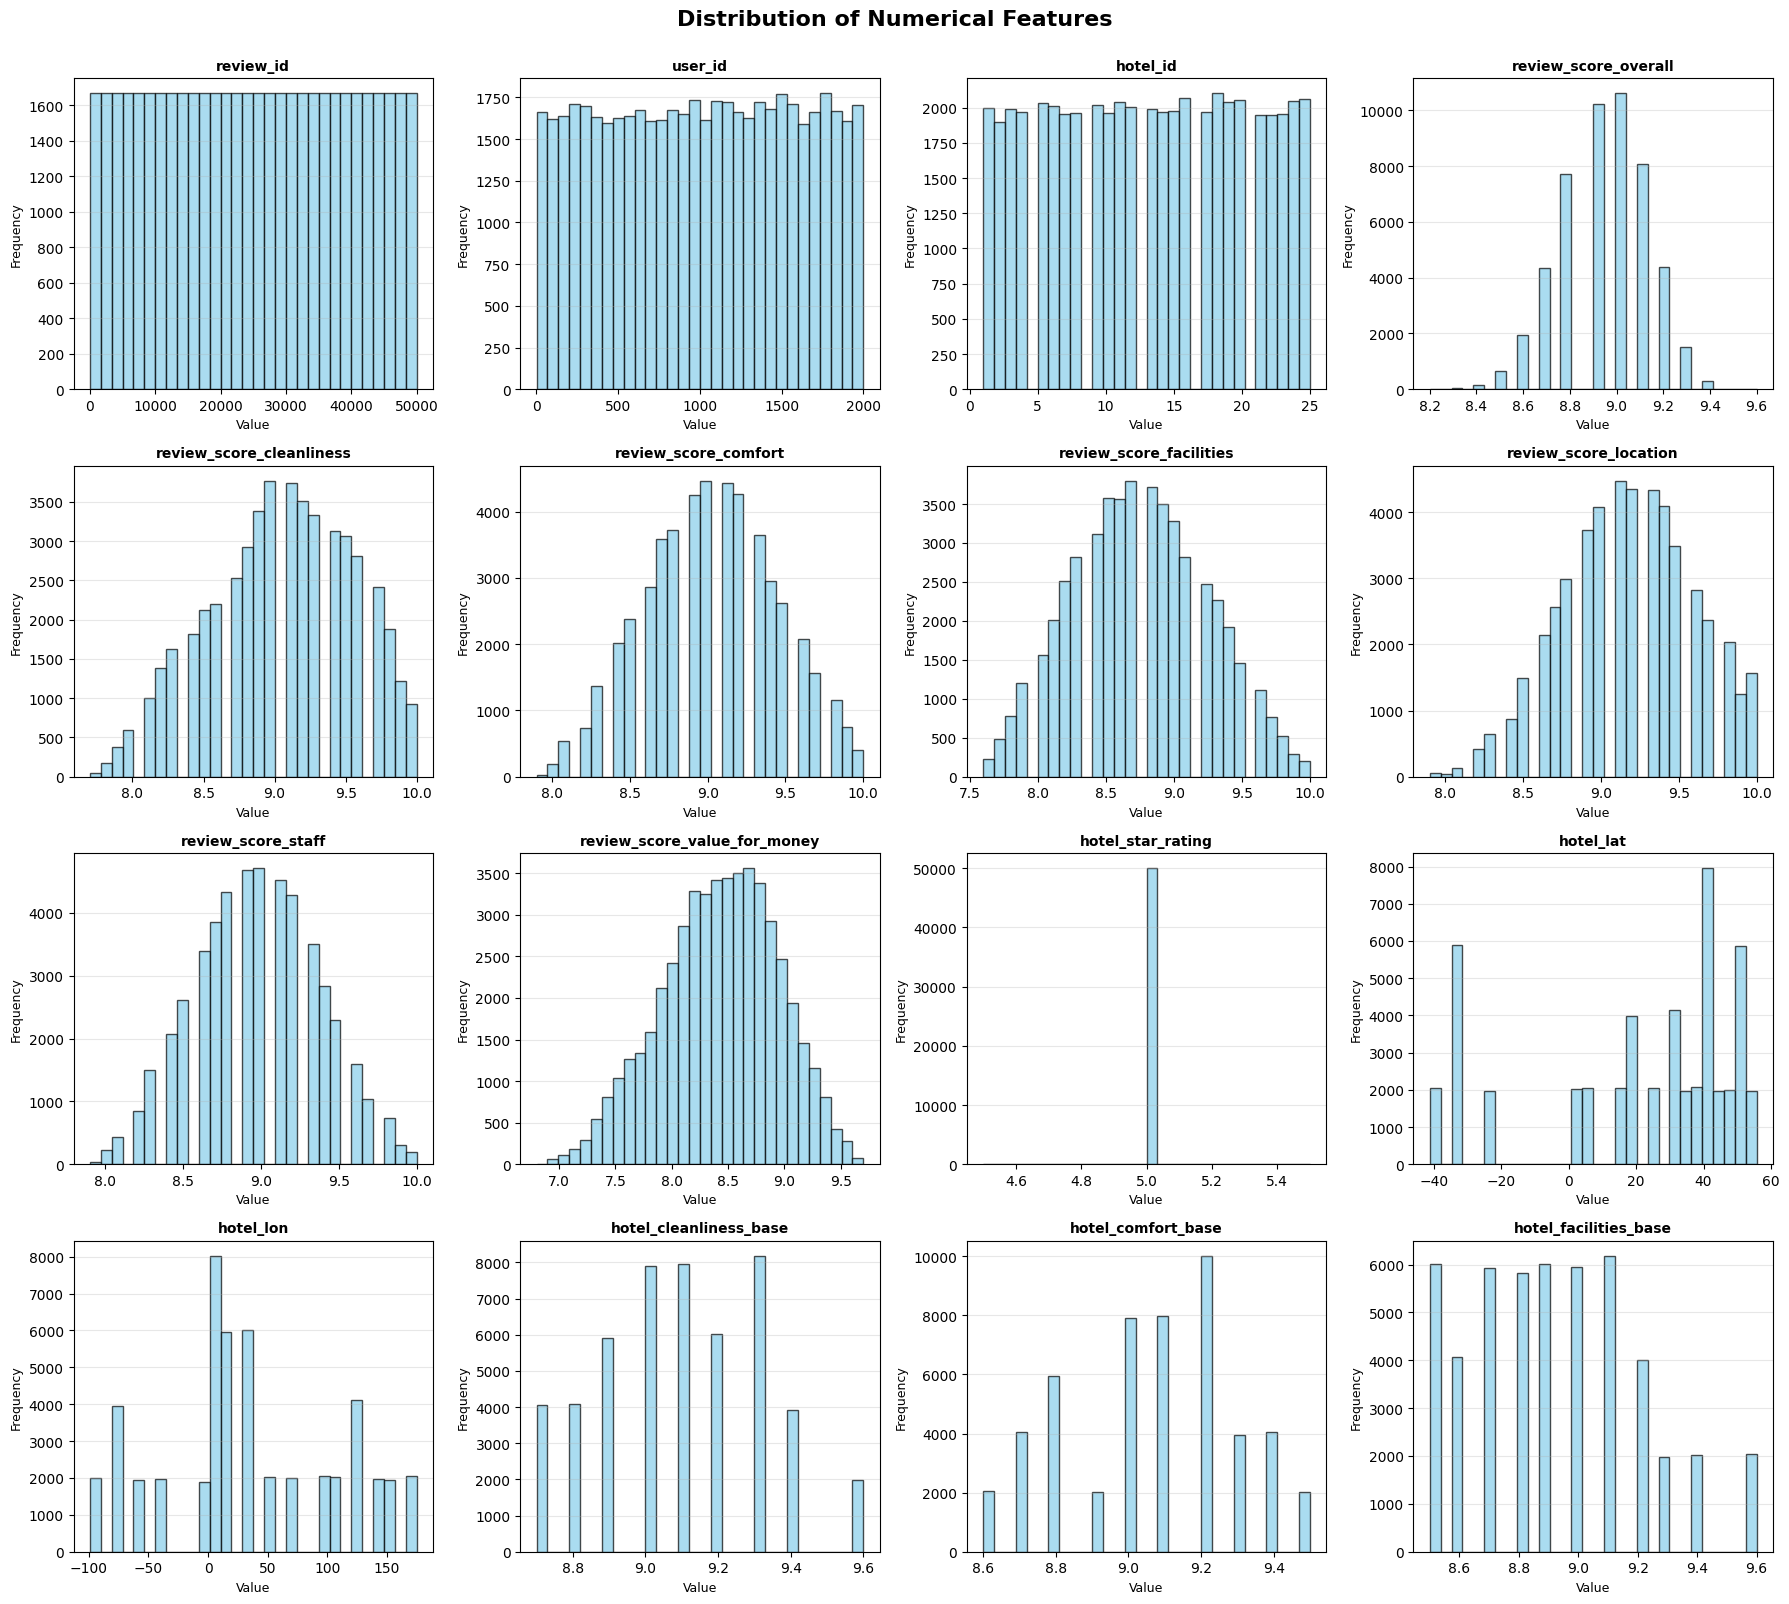

In [88]:
# Visualize the distribution of numerical features using histograms
# This helps us understand if features are normally distributed, skewed, etc.

fig, axes = plt.subplots(4, 4, figsize=(18, 16))
axes = axes.ravel()  # Flatten the 2D array to 1D for easier iteration

# Plot histogram for each numerical column (first 16 columns)
for idx, col in enumerate(numerical_cols[:16]):
    axes[idx].hist(df_merged[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

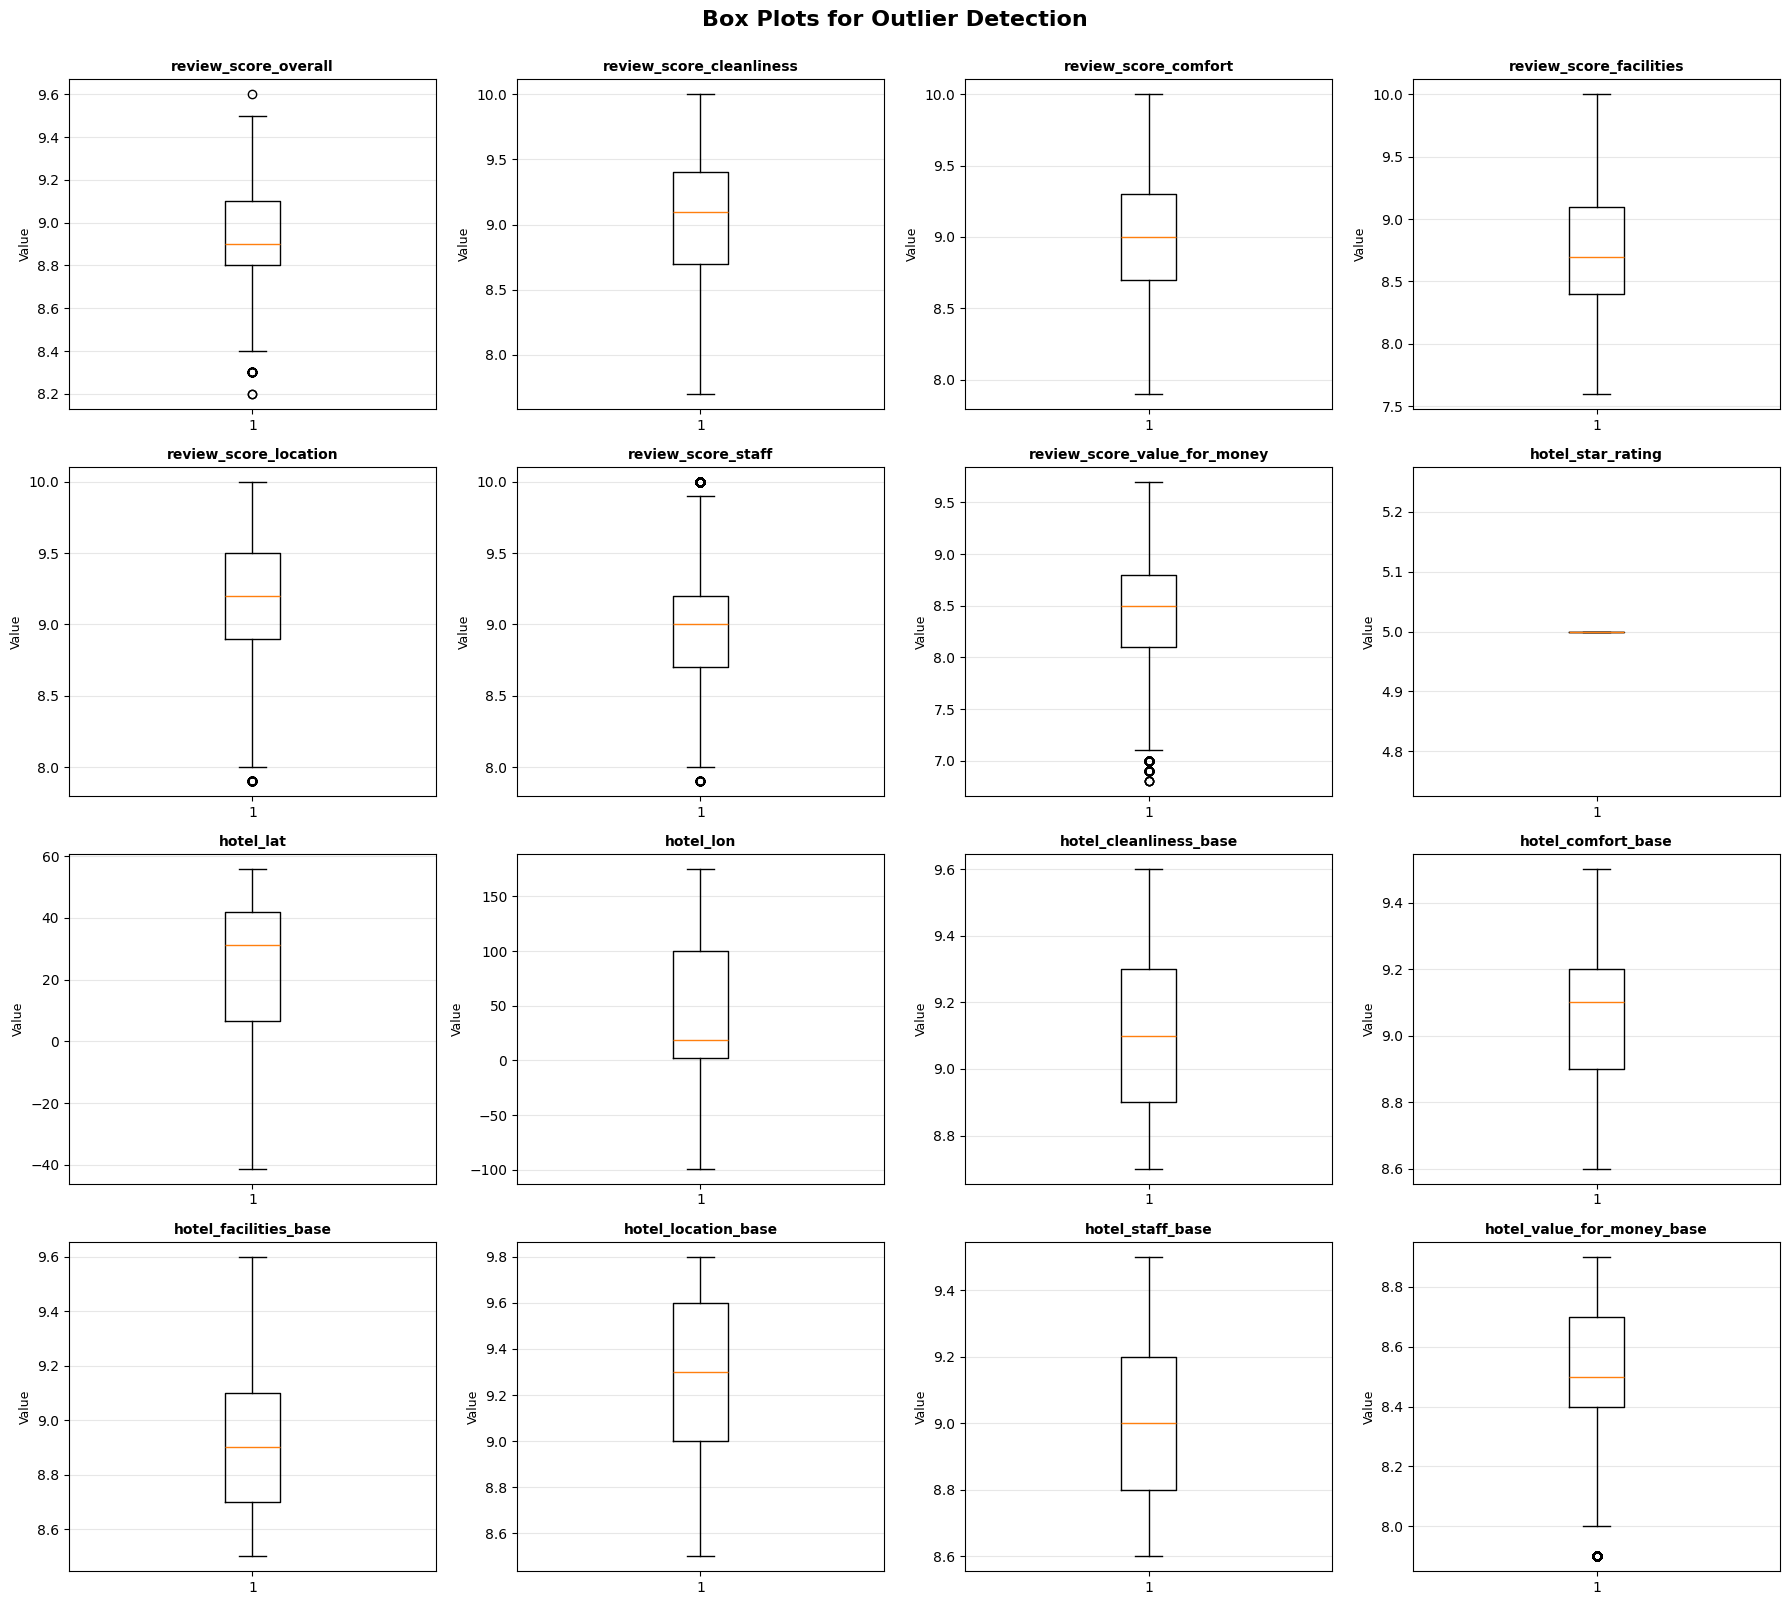


 Insights:
- The box represents the interquartile range (IQR): 25th to 75th percentile
- The line inside the box is the median (50th percentile)
- Whiskers extend to 1.5 * IQR from the box
- Points beyond whiskers are potential outliers


In [89]:
# Use box plots to detect outliers in numerical features
# Box plots show: median (center line), quartiles (box edges), and outliers (dots beyond whiskers)

fig, axes = plt.subplots(4, 4, figsize=(18, 16))
axes = axes.ravel()

plot_idx = 0  # Separate counter for axes indexing
# Create box plot for each numerical column
for idx, col in enumerate(numerical_cols[:19]):
    if col == 'review_id' or col == 'user_id' or col == 'hotel_id':
        continue
    axes[plot_idx].boxplot(df_merged[col], vert=True)
    axes[plot_idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[plot_idx].set_ylabel('Value', fontsize=9)
    axes[plot_idx].grid(axis='y', alpha=0.3)
    plot_idx += 1

plt.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n Insights:")
print("- The box represents the interquartile range (IQR): 25th to 75th percentile")
print("- The line inside the box is the median (50th percentile)")
print("- Whiskers extend to 1.5 * IQR from the box")
print("- Points beyond whiskers are potential outliers")

## 3.3 - Correlation Analysis

Correlation analysis helps us identify relationships between numerical features. High correlation can indicate:
- Redundant features (multicollinearity)
- Features that move together
- Potential feature combinations

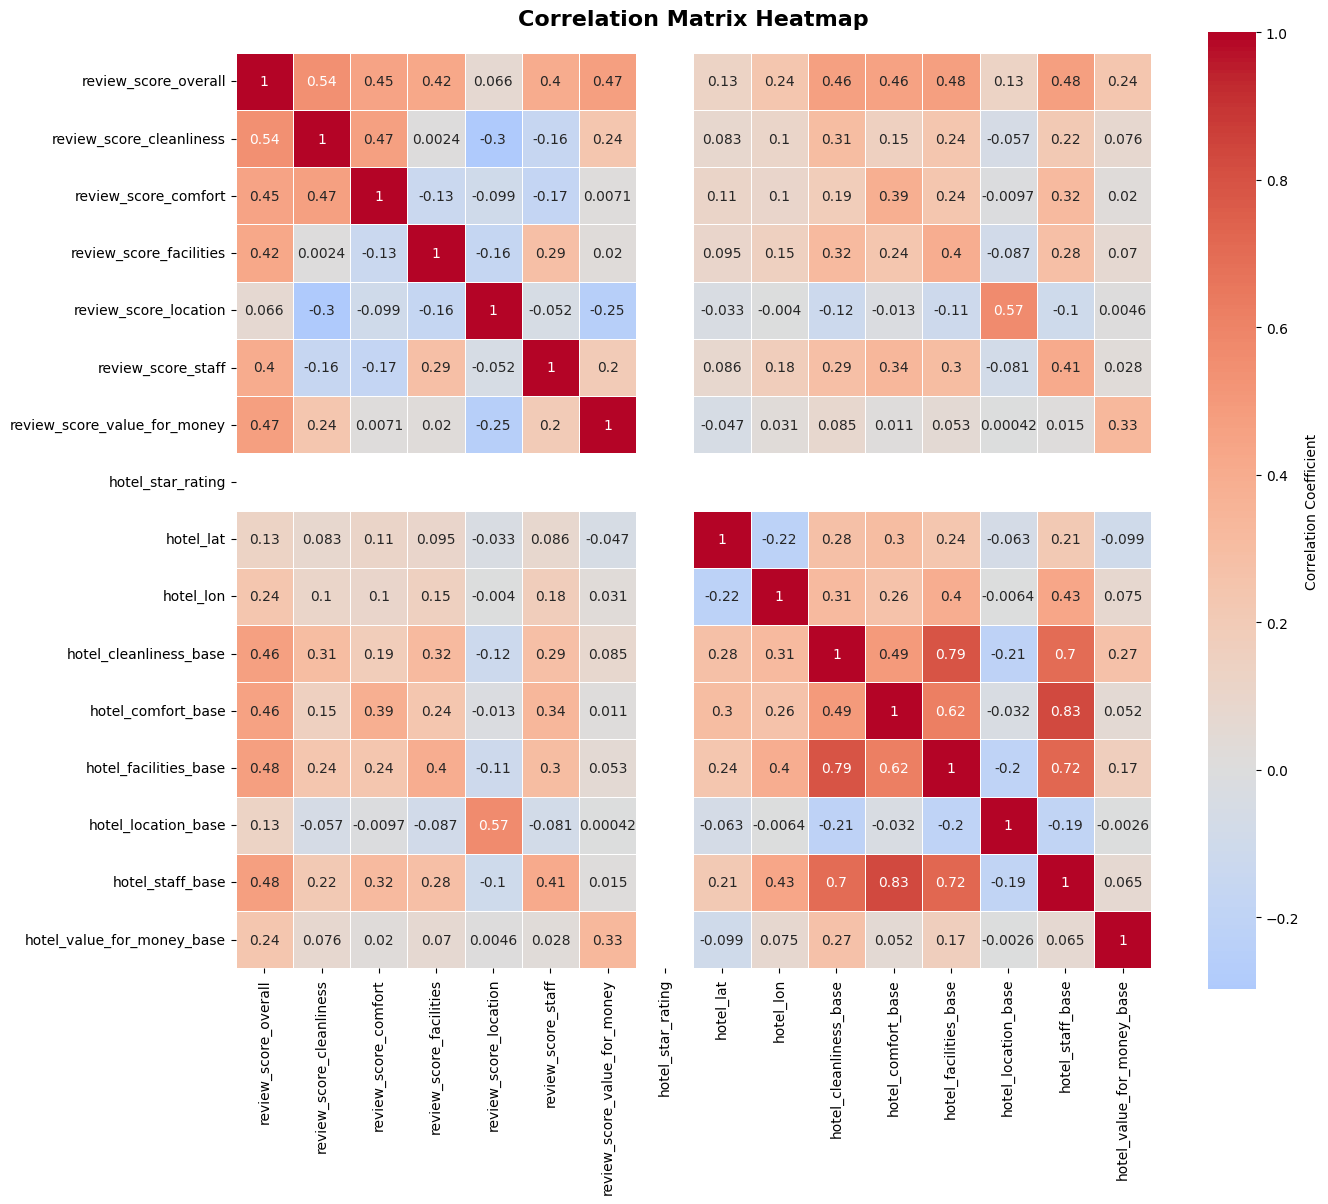



Highly Correlated Feature Pairs (|correlation| > 0.8):


Feature 1                           Feature 2                           Correlation
--------------------------------------------------------------------------------
hotel_comfort_base                  hotel_staff_base                         0.828


In [90]:
# Calculate correlation matrix (Pearson correlation coefficient)
# Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation)

numerical_cols = [col for col in numerical_cols
                           if col not in ['review_id', 'user_id', 'hotel_id']]

correlation_matrix = df_merged[numerical_cols].corr()

# Visualize using a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find and print highly correlated pairs (correlation > 0.8 or < -0.8)
print("\n")
print("Highly Correlated Feature Pairs (|correlation| > 0.8):")
print("\n")
print(f"{'Feature 1':<35} {'Feature 2':<35} {'Correlation':>10}")
print("-"*80)

highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            feat1 = correlation_matrix.columns[i]
            feat2 = correlation_matrix.columns[j]
            print(f"{feat1:<35} {feat2:<35} {corr_value:>10.3f}")
            highly_correlated_pairs.append((feat1, feat2, corr_value))


## 3.4 - Categorical Features Analysis

Let's examine the distribution of categorical features to understand user demographics and traveller characteristics.

In [91]:
# Define categorical features to analyze
categorical_features = ['user_gender', 'user_age_group', 'user_traveller_type','user_country']

print("CATEGORICAL FEATURES DISTRIBUTION")

for feat in categorical_features:
    print(f"\n{feat.upper().replace('_', ' ')}:")
    print("-" * 40)
    counts = df_merged[feat].value_counts()

    # Display counts and percentages
    for value, count in counts.items():
        percentage = (count / len(df_merged)) * 100
        print(f"  {value:<30} {count:>6} ({percentage:>5.2f}%)")

    print(f"\n  Total unique values: {df_merged[feat].nunique()}")
    print("="*80)

CATEGORICAL FEATURES DISTRIBUTION

USER GENDER:
----------------------------------------
  Male                            23630 (47.26%)
  Female                          21659 (43.32%)
  Other                            4711 ( 9.42%)

  Total unique values: 3

USER AGE GROUP:
----------------------------------------
  25-34                           16322 (32.64%)
  35-44                           15452 (30.90%)
  45-54                            7824 (15.65%)
  18-24                            5415 (10.83%)
  55+                              4987 ( 9.97%)

  Total unique values: 5

USER TRAVELLER TYPE:
----------------------------------------
  Couple                          17240 (34.48%)
  Family                          11945 (23.89%)
  Solo                            10444 (20.89%)
  Business                        10371 (20.74%)

  Total unique values: 4

USER COUNTRY:
----------------------------------------
  United States                    6971 (13.94%)
  United Kingdom   

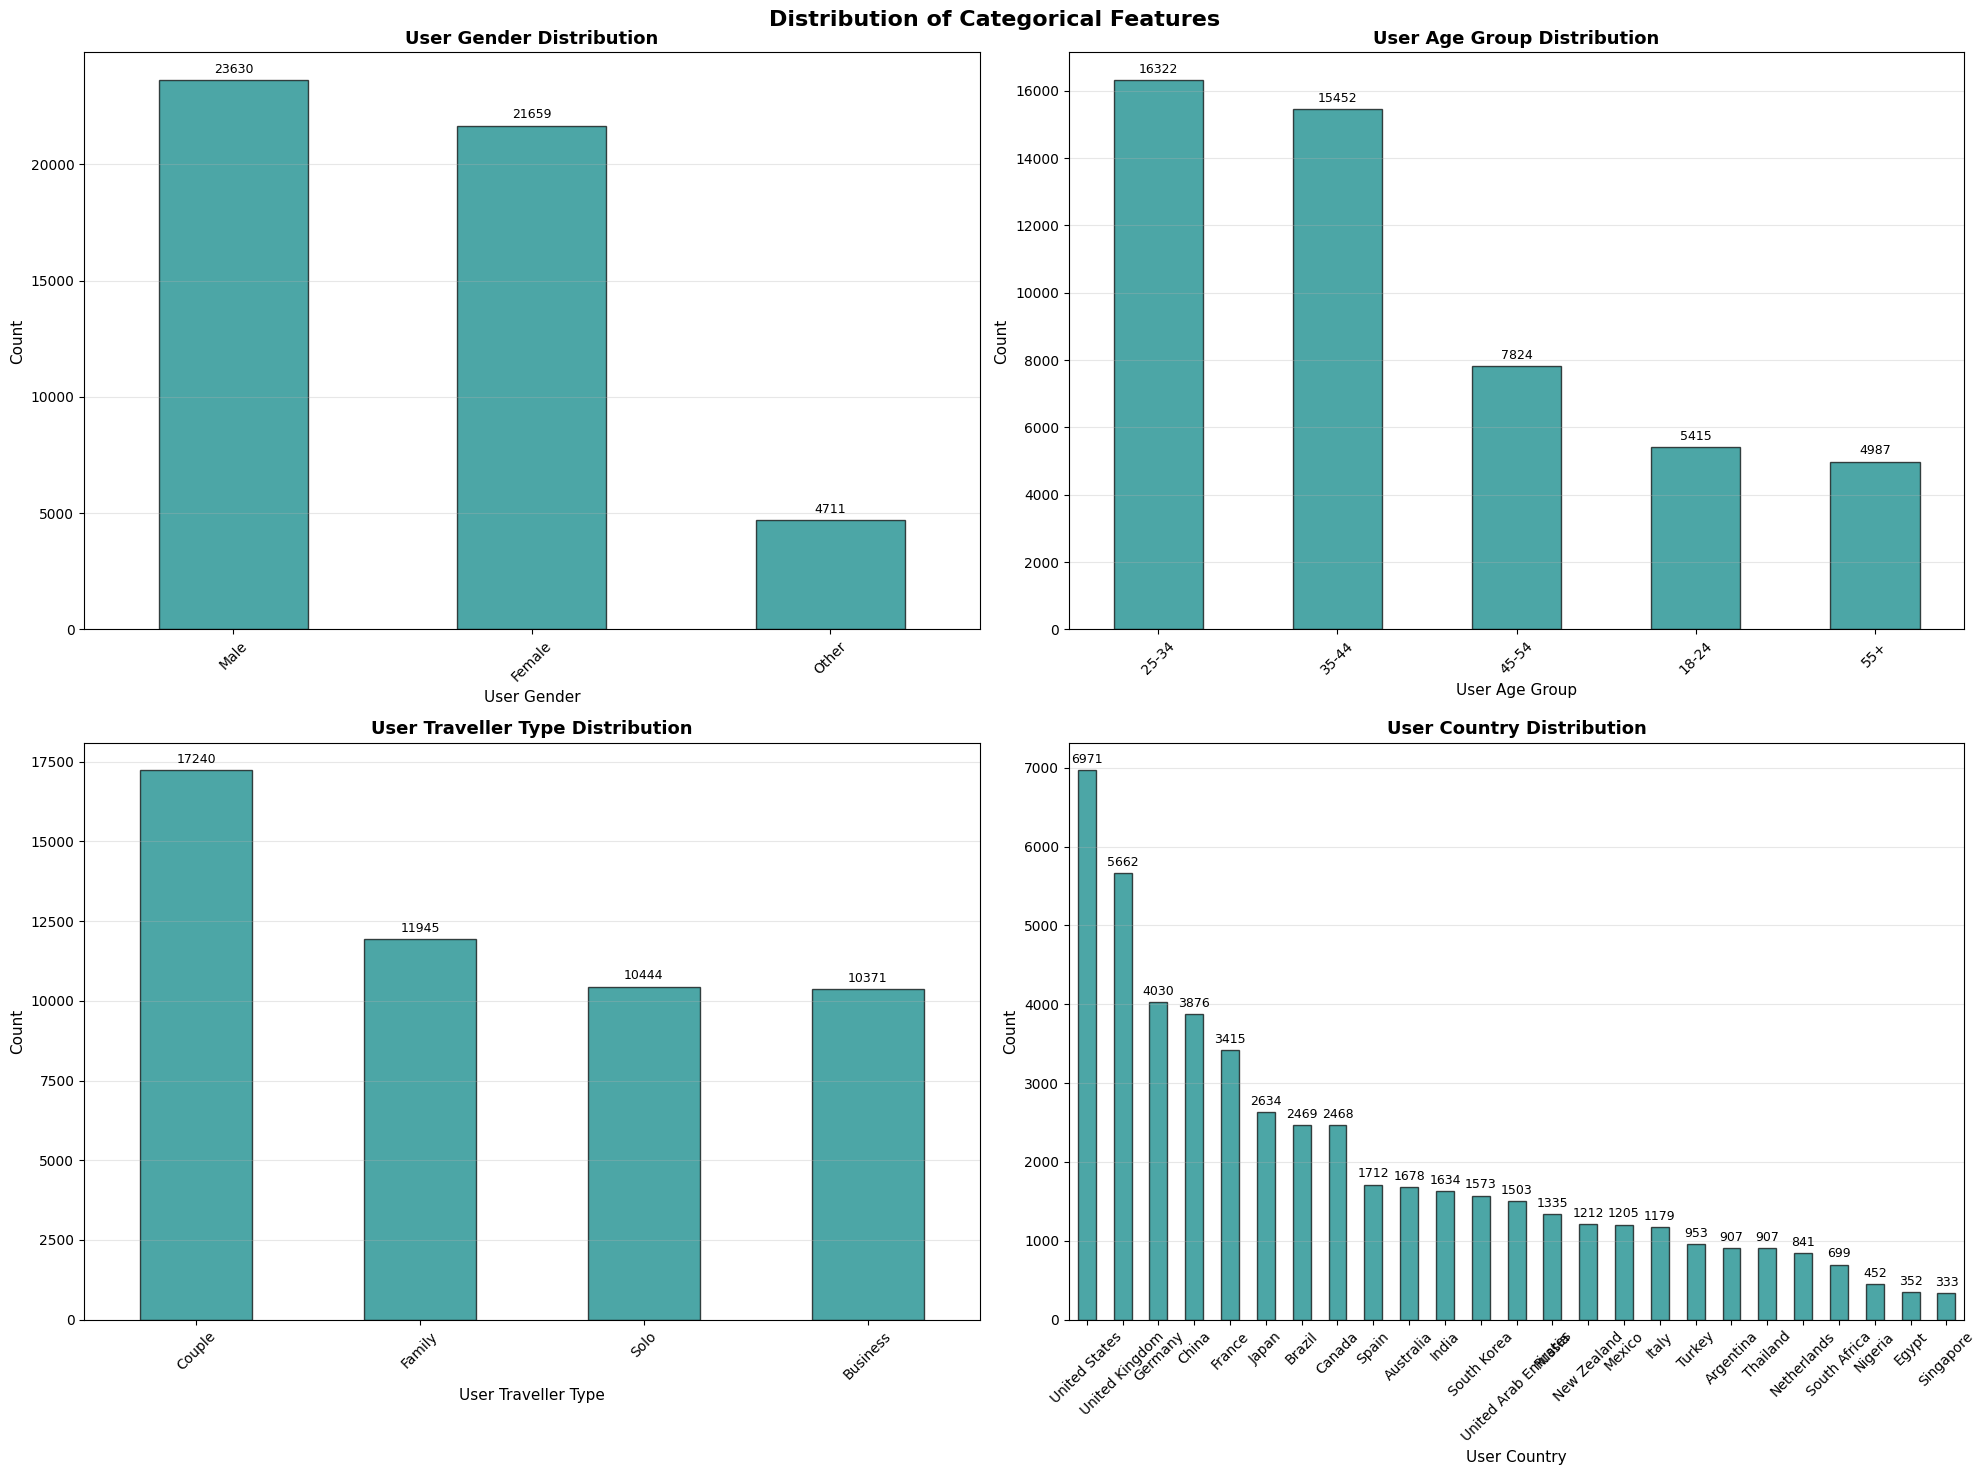

In [92]:
# Visualize categorical features using bar charts
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.ravel()

# Create a bar chart for each categorical feature
for idx, col in enumerate(categorical_features):
    # Get value counts and plot
    value_counts = df_merged[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[idx], color='teal', alpha=0.7, edgecolor='black')

    # Formatting
    axes[idx].set_title(f'{col.replace("_", " ").title()} Distribution',
                        fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_ylabel('Count', fontsize=11)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

    # Add value labels on top of bars
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%d', padding=3, fontsize=9)

plt.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---

## 3.5 - EDA Summary & Key Insights

Based on the exploratory data analysis, here are the key findings:

### Target Variable (country_group)
 **Class imbalance**: The dataset shows a moderate class imbalance with a 6:1 ratio between largest and smallest country groups.
- *Largest class*: Western Europe (most reviews).
- *Smallest class*: Eastern Europe (fewest reviews).

This imbalance indicates the need for *stratified sampling* during the train/test split to ensure all regions are properly represented in the model.

### Data Leakage
The features *hotel_city* and *hotel_country* and *all base line scores of hotels* would allow the model to “cheat” by inferring the target from already-known information rather than learning genuine patterns [Since there are 25 unique hotels].

###  Numerical Features
**Scale**: Most numerical features (review and baseline scores) are on a 0–10 scale.

**Distribution**: They are roughly normally distributed with slight right skew (most hotels receive fairly high ratings).

**Outliers**: Only a few mild outliers were detected in the box plots.

**Variance**: Features show reasonable variance, which is helpful for modeling

###  Feature Correlations
**Review scores**: Highly correlated with each other (users who rate one aspect highly tend to rate others highly too).

**Hotel baseline scores**: Show moderate correlation.

###  Categorical Features

**User Gender:**
- Fairly balanced distribution across Male/Female/Other.
- No major gender bias in the dataset.

**User Age Group:**
- Most users fall in the 25-44 age range
- Represents the primary demographic for hotel reviews.

**Traveller Type:**
- *Couples* and *Families* are the most common (make up about ~60% of reviews).

- *Business* and *Solo* travelers are less common but still well-represented.



---

# Section 4: Feature Engineering

**Objective:** Create deviation features to capture how individual user experiences differ from hotel baselines.

**Approach:** We will use user demographics and deviation features to predict country groups.

## 4.1 - Deviation Features

**Justification:** Deviation features capture how individual user experiences differ from hotel baselines.

**Formula:** deviation = individual_review_score - hotel_baseline_score

This indicates:
- Whether the user's experience was better or worse than the hotel's average
- How user satisfaction compares to typical hotel performance
- Individual user preferences relative to hotel standards

### Computing the Deviation

In [93]:
# Formula: deviation = individual_review_score - hotel_baseline_score

df_merged['deviation_cleanliness'] = (
    df_merged['review_score_cleanliness'] - df_merged['hotel_cleanliness_base']
)

df_merged['deviation_comfort'] = (
    df_merged['review_score_comfort'] - df_merged['hotel_comfort_base']
)

df_merged['deviation_facilities'] = (
    df_merged['review_score_facilities'] - df_merged['hotel_facilities_base']
)

df_merged['deviation_location'] = (
    df_merged['review_score_location'] - df_merged['hotel_location_base']
)

df_merged['deviation_staff'] = (
    df_merged['review_score_staff'] - df_merged['hotel_staff_base']
)

df_merged['deviation_value_for_money'] = (
    df_merged['review_score_value_for_money'] - df_merged['hotel_value_for_money_base']
)

deviation_cols = [col for col in df_merged.columns if col.startswith('deviation_')]
print(df_merged[deviation_cols].head())

   deviation_cleanliness  deviation_comfort  deviation_facilities  \
0                   -0.5               -0.1                  -0.4   
1                    0.4                0.1                  -0.3   
2                    0.9                0.1                  -0.3   
3                   -0.2               -0.3                  -0.4   
4                   -0.2                0.2                   0.3   

   deviation_location  deviation_staff  deviation_value_for_money  
0                -0.5              0.2                        0.7  
1                 0.1             -0.1                        0.4  
2                -0.4             -0.6                        0.2  
3                -0.1              0.1                       -0.5  
4                -0.7              0.3                        0.3  


### Analysis

In [94]:
df_merged[deviation_cols].describe()

,deviation_cleanliness,deviation_comfort,deviation_facilities,deviation_location,deviation_staff,deviation_value_for_money
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-0.039034,-0.039514,-0.174134,-0.093996,-0.043654,-0.078692
std,0.485537,0.397464,0.466146,0.363273,0.369824,0.506056
min,-1.300000,-0.900000,-1.300000,-1.000000,-0.900000,-1.400000
25%,-0.400000,-0.300000,-0.500000,-0.400000,-0.300000,-0.400000
50%,0.000000,0.000000,-0.200000,-0.100000,0.000000,0.000000
75%,0.300000,0.200000,0.200000,0.200000,0.200000,0.300000
max,0.900000,0.900000,0.900000,0.900000,0.900000,1.100000


## 4.2 - Feature Engineering Impact Analysis

Visualize how deviation features differ from original review scores in terms of distribution, range, and values.

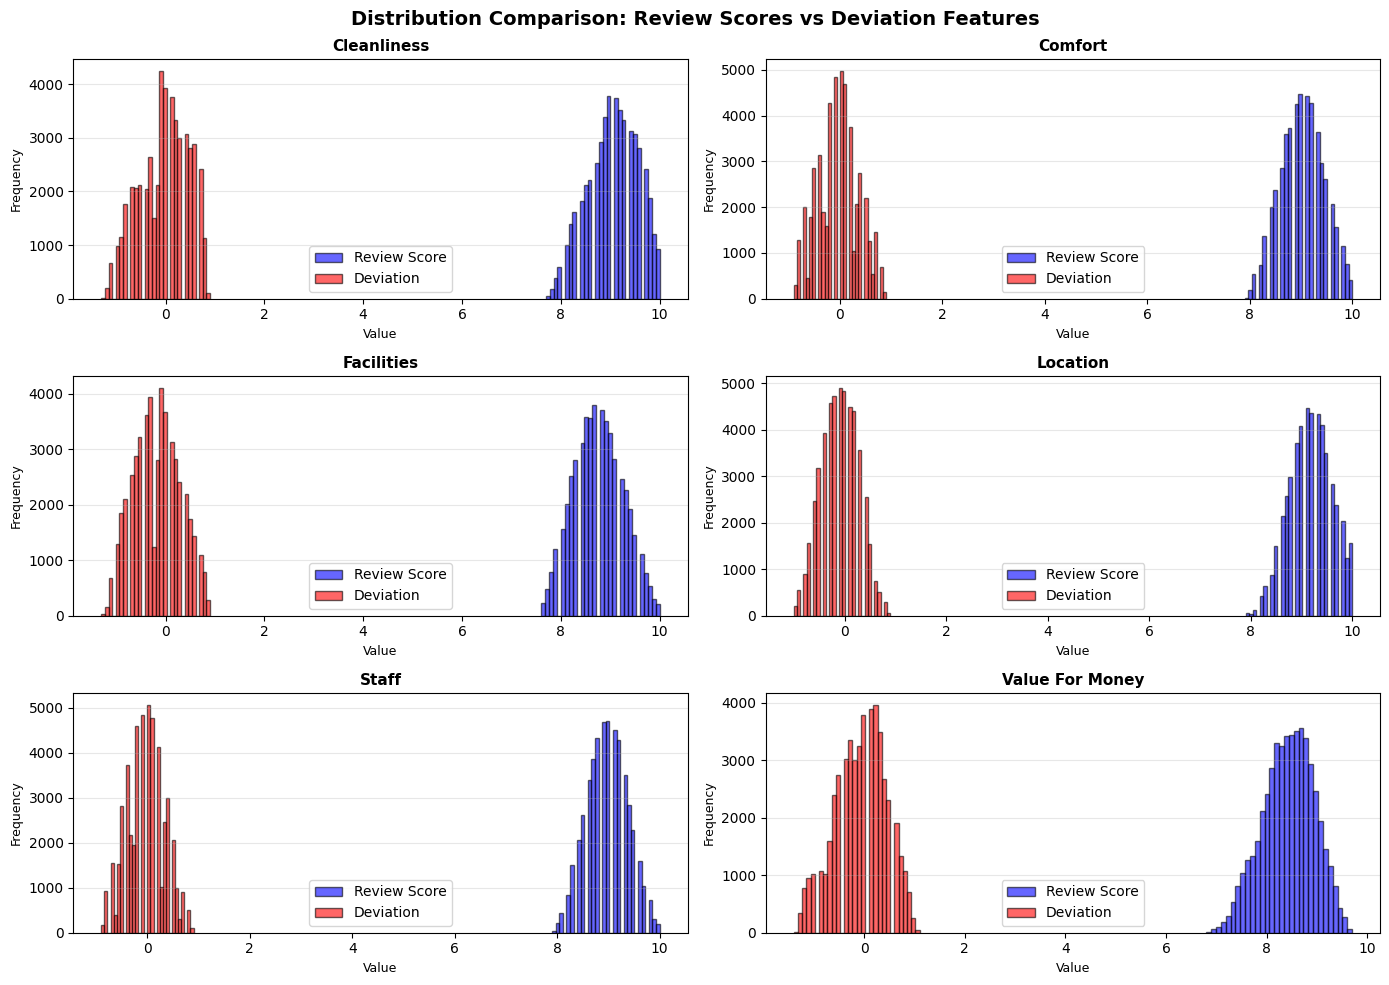

Statistical Summary:

Review Scores (Original):
       review_score_cleanliness  review_score_comfort  \
count              50000.000000          50000.000000   
mean                   9.052558              9.024404   
std                    0.504296              0.423927   
min                    7.700000              7.900000   
25%                    8.700000              8.700000   
50%                    9.100000              9.000000   
75%                    9.400000              9.300000   
max                   10.000000             10.000000   

       review_score_facilities  review_score_location  review_score_staff  \
count             50000.000000           50000.000000        50000.000000   
mean                  8.743062               9.176410            8.972076   
std                   0.498320               0.421086            0.397775   
min                   7.600000               7.900000            7.900000   
25%                   8.400000               8.900000

In [95]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.ravel()

features = ['cleanliness', 'comfort', 'facilities', 'location', 'staff', 'value_for_money']

for idx, feature in enumerate(features):
    review_col = f'review_score_{feature}'
    deviation_col = f'deviation_{feature}'
    
    axes[idx].hist(df_merged[review_col], bins=30, alpha=0.6, label='Review Score', color='blue', edgecolor='black')
    axes[idx].hist(df_merged[deviation_col], bins=30, alpha=0.6, label='Deviation', color='red', edgecolor='black')
    axes[idx].set_title(f'{feature.replace("_", " ").title()}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Distribution Comparison: Review Scores vs Deviation Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Statistical Summary:")
print("\nReview Scores (Original):")
review_cols = [f'review_score_{f}' for f in features]
print(df_merged[review_cols].describe())

print("\nDeviation Features (Engineered):")
deviation_cols = [f'deviation_{f}' for f in features]
print(df_merged[deviation_cols].describe())

## 4.3 - Export Cleaned Dataset

Export the cleaned and engineered dataset with the country_group column and deviation features.

In [96]:
import os
os.makedirs('../Dataset [Cleaned]', exist_ok=True)

df_merged.to_csv('../Dataset [Cleaned]/cleaned_hotel_data.csv', index=False)

---

# Section 5: Data Preprocessing

**Objective:** Prepare data to be ready for our machine learning model through encoding, scaling, and splitting.

**Selected Features:**
- Categorical: *user_gender*, *user_age_group*, *user_traveller_type* (user demoghraphics)
- Numerical: score-based features and the new engineered features *deviation*
- Target: *country_group*

## 5.0 - Importing libraries

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## 5.1 - Feature Selection

In [98]:
df_processed = df_merged.copy()

selected_columns = [
    # Categorical features
    'user_gender', 'user_age_group', 'user_traveller_type',

    # Review scores (excluding overall)
    'review_score_cleanliness', 'review_score_comfort',
    'review_score_facilities', 'review_score_location',
    'review_score_staff', 'review_score_value_for_money',

    # Deviation features
    'deviation_cleanliness', 'deviation_comfort',
    'deviation_facilities', 'deviation_location',
    'deviation_staff', 'deviation_value_for_money',

    # Target
    'country_group'
]

df_processed = df_processed[selected_columns]

## 5.2 - Encoding

**Objective**: Converting categorical features into numerical form.

*One-hot encoding:* used for unordered (nominal) features.

In [99]:
df_processed = pd.get_dummies(
    df_processed,
    columns=['user_gender', 'user_age_group', 'user_traveller_type'],
    drop_first=True
)

print("After encoding:")
print(f"\nColumn names:")
print(df_processed.columns.tolist())

After encoding:

Column names:
['review_score_cleanliness', 'review_score_comfort', 'review_score_facilities', 'review_score_location', 'review_score_staff', 'review_score_value_for_money', 'deviation_cleanliness', 'deviation_comfort', 'deviation_facilities', 'deviation_location', 'deviation_staff', 'deviation_value_for_money', 'country_group', 'user_gender_Male', 'user_gender_Other', 'user_age_group_25-34', 'user_age_group_35-44', 'user_age_group_45-54', 'user_age_group_55+', 'user_traveller_type_Couple', 'user_traveller_type_Family', 'user_traveller_type_Solo']


## 5.3 - Split Features and Target

In [100]:
X = df_processed.drop('country_group', axis=1)
y = df_processed['country_group']

## 5.4 - Train-Test Split

Split the data into 80% training and 20% test sets using stratified sampling.

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Dataset Split:")
print(f"Train: {X_train.shape} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test:  {X_test.shape} ({len(X_test)/len(X)*100:.1f}%)")

Dataset Split:
Train: (40000, 21) (80.0%)
Test:  (10000, 21) (20.0%)


## 5.5 - Encode Target Variable

Convert country_group labels to numerical format using LabelEncoder.

In [102]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Class Mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{i}: {class_name}")

Class Mapping:
0: Africa
1: East_Asia
2: Eastern_Europe
3: Middle_East
4: North_America
5: North_America_Mexico
6: Oceania
7: South_America
8: South_Asia
9: Southeast_Asia
10: Western_Europe


# Section 6: Model Development

**Objective:** Training and evaluating two classification models to predict our target variable (*country_groups*).

We implemented:
1. **Logistic Regression**: A linear baseline model.
2. **Random Forest Classifier (RFC)**: A machine learning model that makes predictions by combining the results of many decision trees.

## 6.0 - Importing Libraries

In [103]:
from sklearn.linear_model import LogisticRegression  # Linear classification model
from sklearn.ensemble import RandomForestClassifier  # Ensemble tree-based model
from sklearn.model_selection import GridSearchCV  # Exhaustive search over parameter grid
from sklearn.metrics import accuracy_score         # Proportion of correct predictions
from sklearn.metrics import classification_report  # Detailed per-class metrics
from sklearn.metrics import confusion_matrix       # Matrix of actual vs predicted labels
from sklearn.metrics import precision_score        # Precision = TP / (TP + FP)
from sklearn.metrics import recall_score           # Recall = TP / (TP + FN)
from sklearn.metrics import f1_score               # Harmonic mean of precision and recall

## 6.1 - Logistic Regression

**What is Logistic Regression?**
- A linear model that predicts class probabilities using the logistic (sigmoid) function.

- Simple, fast, and interpretable serving as a strong baseline

**Key Parameters:**
- `max_iter=1000`: Maximum number of iterations for the optimizer to converge.
- `class_weight='balanced'`: Automatically adjusts weights to handle any class imbalance.
- `random_state=42`: Ensures reproducibility of results.
- `n_jobs=-1`: Uses all available CPU cores for parallel processing.

In [104]:
# Initialize the model
lr_model = LogisticRegression(
    max_iter=1000,              # Maximum iterations
    class_weight='balanced',    # Handle any class imbalance automatically
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all CPU cores
)

### Model Training

In [105]:
# Train the model
lr_model.fit(X_train, y_train_encoded)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Model Testing

In [106]:
# Test the model
y_test_pred_lr = lr_model.predict(X_test)

# Calculate performance metrics
lr_test_acc = accuracy_score(y_test_encoded, y_test_pred_lr)
lr_test_prec = precision_score(y_test_encoded, y_test_pred_lr, average='weighted', zero_division=0)
lr_test_rec = recall_score(y_test_encoded, y_test_pred_lr, average='weighted', zero_division=0)
lr_test_f1 = f1_score(y_test_encoded, y_test_pred_lr, average='weighted', zero_division=0)

print("Model Performance")
print("\n")
print(f"{'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-"*80)
print(f"{lr_test_acc:<12.4f} {lr_test_prec:<12.4f} {lr_test_rec:<12.4f} {lr_test_f1:<12.4f}")

Model Performance


Accuracy     Precision    Recall       F1-Score    
--------------------------------------------------------------------------------
0.7068       0.7373       0.7068       0.7021      


## 6.2 - Random Forest Classifier

**What is Random Forest?**
- An ensemble of decision trees that vote on the final prediction.
- Each tree is trained on a random subset of the data.

Using *GridSearchCV* to determine the best parameters:

**What is GridSearchCV?**
- Exhaustively searches through a specified parameter grid.
- Performs k-fold cross-validation for each parameter combination (preventing overfitting).
- Automatically selects the best hyperparameters based on a scoring metric.

**Hyperparameter Grid:**
- `n_estimators`: Number of trees in the forest (more trees = better but slower).
- `max_depth`: Maximum depth of each tree (controls tree complexity).
- `min_samples_split`: Minimum samples required to split a node (prevents overfitting).
- `min_samples_leaf`: Minimum samples required at each leaf node (prevents overfitting).

In [107]:
# Initialize the model
rf_base = RandomForestClassifier(
    class_weight='balanced',  # Handle class imbalance
    random_state=42,          # For reproducibility
    n_jobs=-1                 # Use all CPU cores
)

# GridSearchCV will try all combinations of these parameters
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees to test
    'max_depth': [10, 15, 20, None],          # Maximum tree depth (None = unlimited)
    'min_samples_split': [2, 5, 10],          # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]             # Minimum samples at leaf nodes
}

# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation: splits training data into 5 parts, trains on 4 parts and validates on 1 part, rotating through all combinations
grid_search = GridSearchCV(
    estimator=rf_base,           # The model to tune
    param_grid=param_grid,       # Parameter combinations to try
    cv=5,                        # 5-fold cross-validation
    scoring='f1_weighted',       # Optimization metric (weighted F1-score)
    n_jobs=-1,                   # Parallel processing
    verbose=2                    # Print progress updates
)

### Model Training

In [108]:
#Train all possible models using the parameter grid
grid_search.fit(X_train, y_train_encoded)

# Extract the best model found by GridSearchCV
rf_model = grid_search.best_estimator_

# Display the best parameters found
print("Best Parameters Found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest Cross-Validation F1-Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters Found:
  max_depth: None
  min_samples_leaf: 1
  min_samples_split: 5
  n_estimators: 200

Best Cross-Validation F1-Score: 0.9120


### Model Testing

In [109]:
# Test the model
y_test_pred_rf = rf_model.predict(X_test)

# Calculate performance metricst
rf_test_acc = accuracy_score(y_test_encoded, y_test_pred_rf)
rf_test_prec = precision_score(y_test_encoded, y_test_pred_rf, average='weighted', zero_division=0)
rf_test_rec = recall_score(y_test_encoded, y_test_pred_rf, average='weighted', zero_division=0)
rf_test_f1 = f1_score(y_test_encoded, y_test_pred_rf, average='weighted', zero_division=0)

print("Model Performance")
print("\n")
print(f"{'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-"*80)
print(f"{rf_test_acc:<12.4f} {rf_test_prec:<12.4f} {rf_test_rec:<12.4f} {rf_test_f1:<12.4f}")


Model Performance


Accuracy     Precision    Recall       F1-Score    
--------------------------------------------------------------------------------
0.9304       0.9339       0.9304       0.9298      


## 6.3 - Understanding GridSearchCV Results

### **Overview**

GridSearchCV tested **108 different parameter combinations** with **5-fold cross-validation**, resulting in **540 total model trainings**. Here's what that means:

**The Process:**
1. **Parameter Grid**: We defined 4 hyperparameters with multiple values each:
   - `n_estimators`: 3 options [50, 100, 200]
   - `max_depth`: 4 options [10, 15, 20, None]
   - `min_samples_split`: 3 options [2, 5, 10]
   - `min_samples_leaf`: 3 options [1, 2, 4]
   - Total combinations: 3 × 4 × 3 × 3 = **108 combinations**

2. **5-Fold Cross-Validation**: For each combination:
   - Split training data into 5 parts
   - Train on 4 parts, validate on 1 part
   - Rotate 5 times so each part serves as validation once
   - Average the 5 results to get reliable performance estimate

3. **Total Work**: 108 combinations × 5 folds = **540 model trainings**

---

### **Best Parameters Found:**

GridSearchCV automatically identified the optimal combination:

| Parameter | Best Value | What It Means |
|-----------|------------|---------------|
| **n_estimators** | 200 | Use 200 trees (maximum we tested) - more trees = more diverse predictions |
| **max_depth** | None | Allow trees to grow to unlimited depth - captures complex patterns |
| **min_samples_split** | 5 | Need at least 5 samples to split a node - prevents splitting on noise |
| **min_samples_leaf** | 1 | Allow leaf nodes with 1 sample - aggressive but balanced by ensemble |

**Why These Parameters Work:**
- **200 trees**: Our 11-class problem benefits from many diverse decision trees voting together
- **Unlimited depth**: With 50,000 training samples, we have enough data to support deep trees without severe overfitting
- **min_samples_split=5**: Strikes a balance - not too restrictive (like 10) but prevents splitting on tiny groups (like 2)
- **min_samples_leaf=1**: Seems aggressive, but the ensemble of 200 trees averages out individual tree overfitting

---

### **Cross-Validation F1-Score: 0.9120 (91.20%)**

This is **excellent** performance! Here's why this metric matters:

**What is F1-Score?**
- Harmonic mean of Precision and Recall
- Ranges from 0 (worst) to 1 (perfect)
- Weighted F1 accounts for class imbalance (our 6:1 ratio)

**Why Cross-Validation Score Matters:**
- **NOT** based on a single test/validation split
- **Averaged** across 5 different validation sets
- Proves the model **generalizes well** to unseen data
- More reliable than a single train/test split

**What 91.20% Means:**
- Out of 100 predictions, the model correctly classifies ~91 on average
- This is the performance **during training** on held-out validation folds
- High confidence the model will perform well on new hotel review data


## Section 6.4 - Model Comparison and Selection


lr_scores: [0.7068, 0.7020565672271829]
rf_scores: [0.9304, 0.9298192175533709]


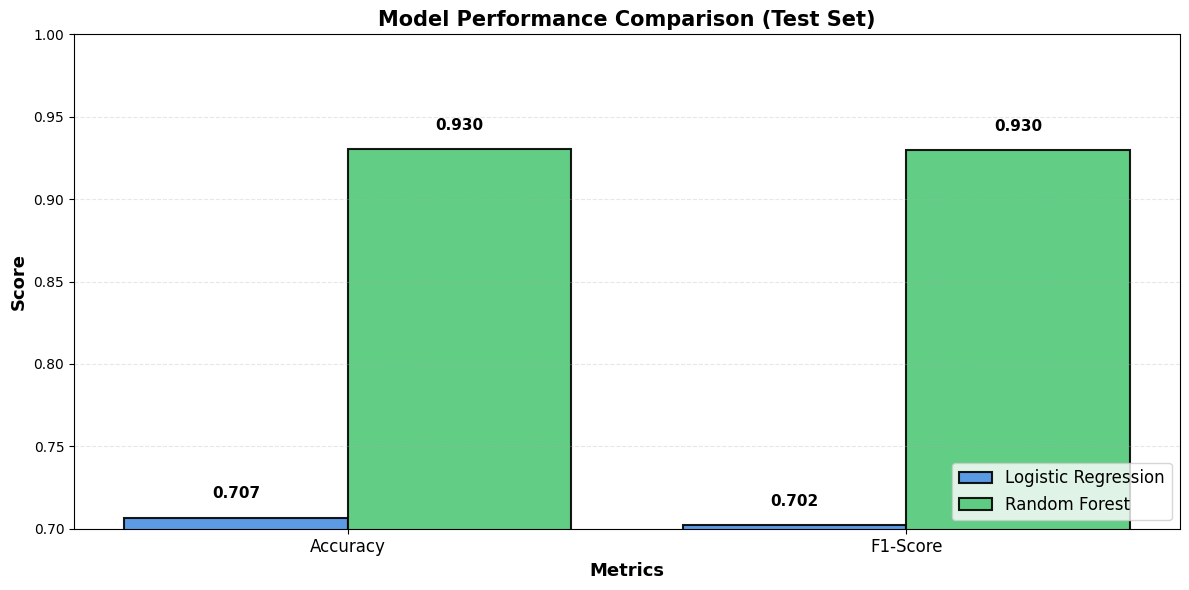

In [110]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest (Optimized)'],
    'Test Accuracy': [lr_test_acc, rf_test_acc],
    'Test F1': [lr_test_f1, rf_test_f1]
})

fig, ax = plt.subplots(figsize=(12, 6))

metrics = ['Accuracy', 'F1-Score']
lr_scores = [lr_test_acc, lr_test_f1]
rf_scores = [rf_test_acc, rf_test_f1]

print(f"\nlr_scores: {lr_scores}")
print(f"rf_scores: {rf_scores}")

x = np.arange(len(metrics))
width = 0.4


bar1 = ax.bar(x - width/2, lr_scores, width, label='Logistic Regression', 
              color='#4A90E2', alpha=0.9, edgecolor='black', linewidth=1.5)
bar2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', 
              color='#50C878', alpha=0.9, edgecolor='black', linewidth=1.5)

ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_xlabel('Metrics', fontsize=13, fontweight='bold')
ax.set_title('Model Performance Comparison (Test Set)', fontsize=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12, loc='lower right')
ax.set_ylim([0.70, 1.0])
ax.grid(axis='y', alpha=0.3, linestyle='--')


for i, (v1, v2) in enumerate(zip(lr_scores, rf_scores)):
    ax.text(i - width/2, v1 + 0.01, f'{v1:.3f}', 
            ha='center', va='bottom', fontsize=11, fontweight='bold')
    ax.text(i + width/2, v2 + 0.01, f'{v2:.3f}', 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Section 7: Model Evaluation

**Objective:** Evaluate the best performing model (Random Forest with optimized hyperparameters) using the traditional evaluation metrics.


## 7.1 - Confusion Matrix Analysis

Visualize the confusion matrix to understand where the Random Forest model makes correct predictions and misclassifications.

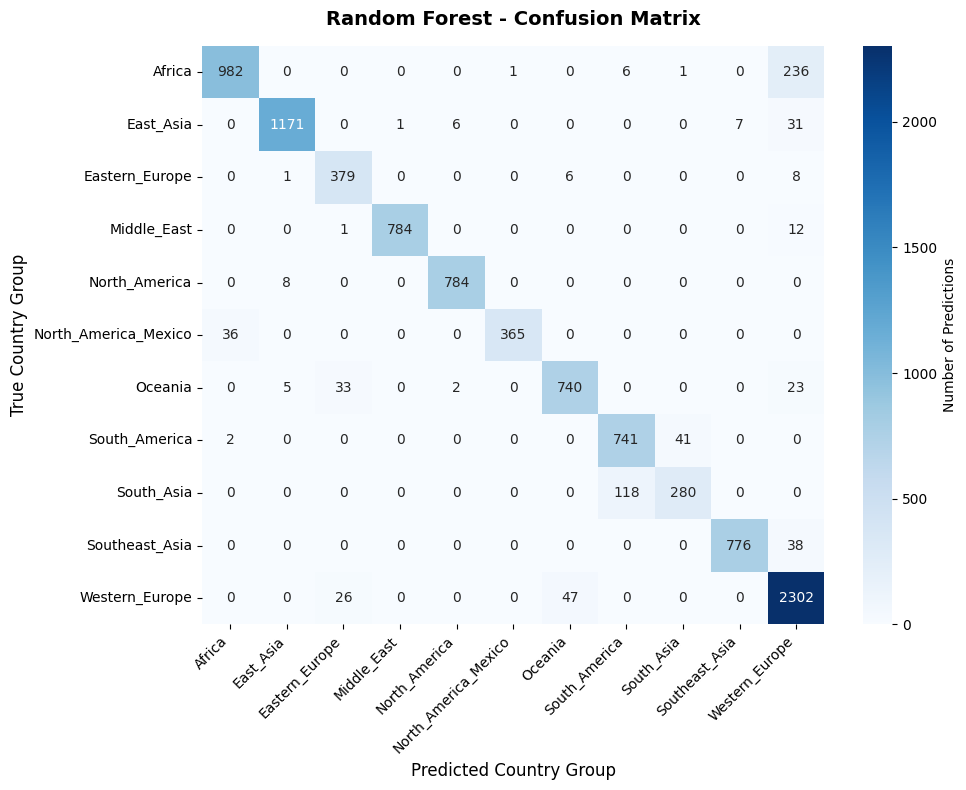


Class Labels Mapping:
  0: Africa
  1: East_Asia
  2: Eastern_Europe
  3: Middle_East
  4: North_America
  5: North_America_Mexico
  6: Oceania
  7: South_America
  8: South_Asia
  9: Southeast_Asia
  10: Western_Europe


In [111]:
plt.figure(figsize=(10, 8))
y_test_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test_encoded, y_test_pred)
class_names = label_encoder.classes_

# Plot
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Number of Predictions'})
plt.title("Random Forest - Confusion Matrix", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Predicted Country Group", fontsize=12)
plt.ylabel("True Country Group", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nClass Labels Mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"  {i}: {class_name}")

## 7.2 - Classification Report

Per-class performance metrics showing precision, recall, and F1-score.

In [112]:
y_test_pred_rf = rf_model.predict(X_test)
print(classification_report(
    y_test_encoded,
    y_test_pred_rf,
    target_names=label_encoder.classes_,
    zero_division=0
))

                      precision    recall  f1-score   support

              Africa       0.96      0.80      0.87      1226
           East_Asia       0.99      0.96      0.98      1216
      Eastern_Europe       0.86      0.96      0.91       394
         Middle_East       1.00      0.98      0.99       797
       North_America       0.99      0.99      0.99       792
North_America_Mexico       1.00      0.91      0.95       401
             Oceania       0.93      0.92      0.93       803
       South_America       0.86      0.95      0.90       784
          South_Asia       0.87      0.70      0.78       398
      Southeast_Asia       0.99      0.95      0.97       814
      Western_Europe       0.87      0.97      0.92      2375

            accuracy                           0.93     10000
           macro avg       0.94      0.92      0.93     10000
        weighted avg       0.93      0.93      0.93     10000



## 7.3 - Evaluation Summary

### **Model Performance:**

The Random Forest model achieved:
- **Test Accuracy: ~93%** - Excellent for an 11-class classification problem.

## 7.4 - Feature Importance Analysis

Analyze which features contribute most to the Random Forest model's predictions.

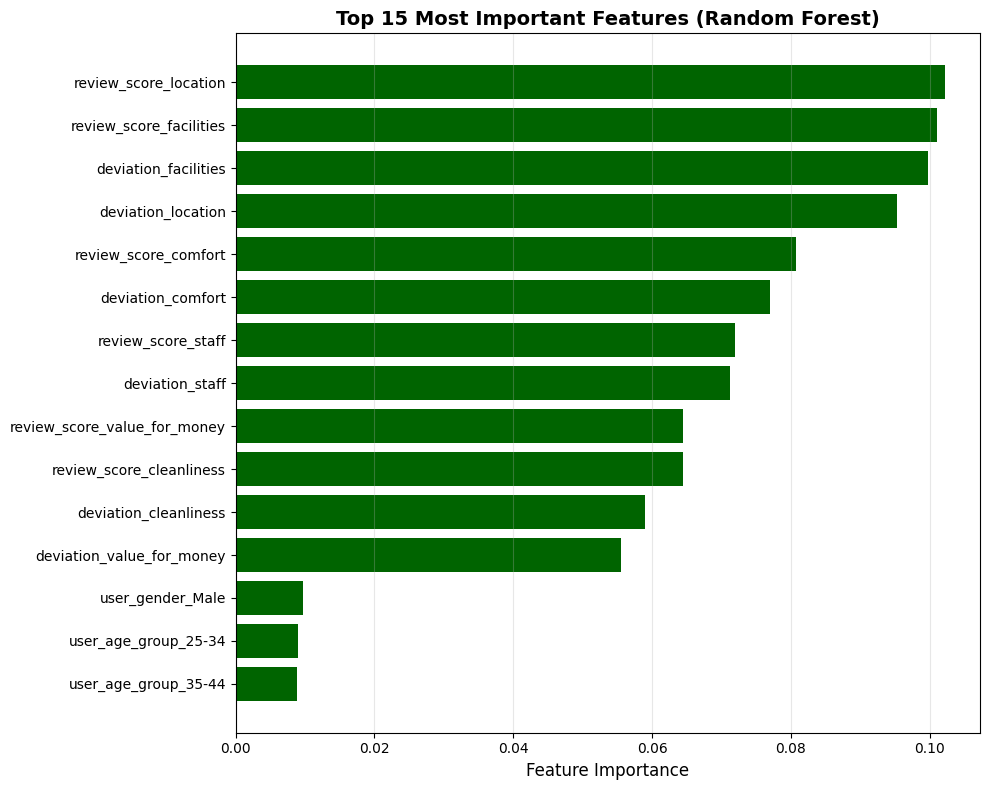

Top 10 Most Important Features:
                     feature  importance
       review_score_location    0.102164
     review_score_facilities    0.101137
        deviation_facilities    0.099839
          deviation_location    0.095314
        review_score_comfort    0.080813
           deviation_comfort    0.077002
          review_score_staff    0.071945
             deviation_staff    0.071173
review_score_value_for_money    0.064444
    review_score_cleanliness    0.064417


In [113]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='darkgreen')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 15 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

---

# Section 8: Model Explainability (XAI)

**Objective:** Use SHAP and LIME to explain model predictions and identify important features.

**Why XAI Matters:**
- Understand which features drive predictions.
- Build trust in the model's decision-making process.
- Identify potential biases or unexpected patterns.

**Tools:**
- **SHAP (SHapley Additive exPlanations)**: *Game theory-based approach* for global and local explanations.
- **LIME (Local Interpretable Model-agnostic Explanations)**: Local *surrogate models* for individual predictions

## 8.1 SHAP

In [114]:
# - SHAP Analysis -
# !pip install shap
import shap
import numpy as np


explainer = shap.TreeExplainer(rf_model)

sample_size = 100
X_test_sample = X_test.sample(n=sample_size, random_state=42)

shap_values = explainer.shap_values(X_test_sample)

### 8.1.1 - Global feature importance with SHAP

**What is Global Feature Importance?**
- Shows which features are most important across ALL predictions.
- Helps identify the most influential features in the model.

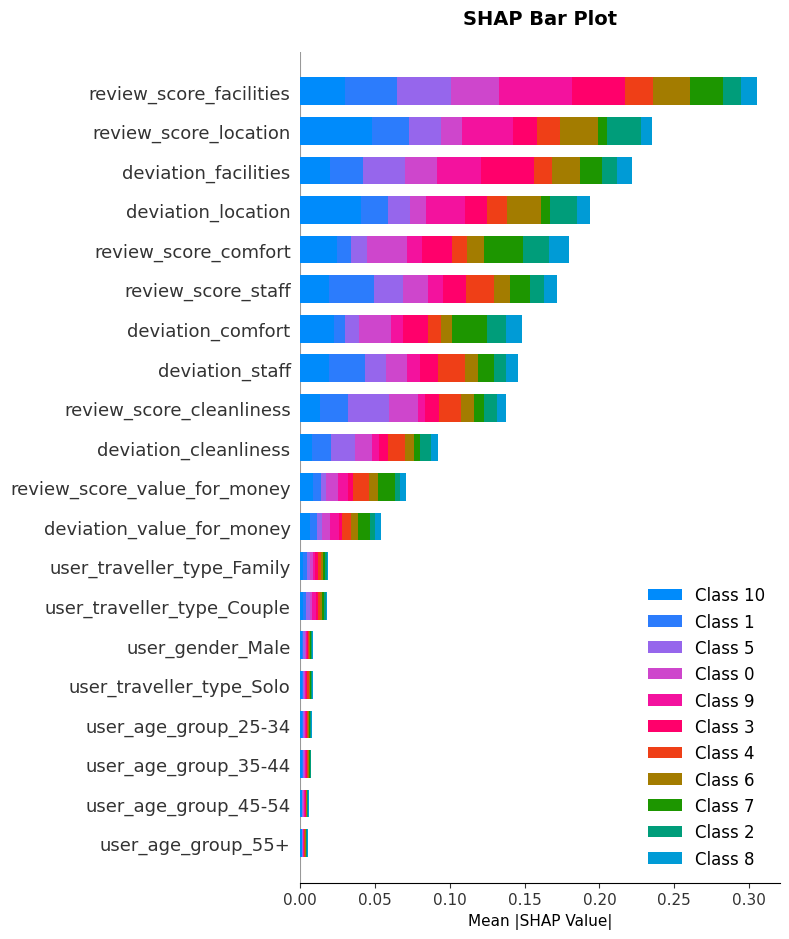

In [115]:
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Bar Plot", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Mean |SHAP Value|", fontsize=11)
plt.tight_layout()
plt.show()

#### SHAP Feature Importance Analysis

The SHAP bar plot above shows the **mean absolute SHAP values** for all features in the Random Forest model, representing the average impact each feature has on model predictions across all classes and samples.

#### Key Findings:

**Most Important Features (Top 5):**

1. **review_score_facilities (0.30)** - The most influential feature, indicating that a hotel's facilities score is the strongest predictor of its country group. This suggests that facility quality varies significantly across different regions.

2. **review_score_location (0.23)** - Location ratings are the second most important, reflecting how geographic positioning and accessibility differ across country groups.

3. **deviation_facilities (0.20)** - The deviation of facilities score from the hotel baseline is highly predictive, showing that user experiences relative to hotel standards matter significantly.

4. **deviation_location (0.17)** - Similar to facilities, how location ratings deviate from baseline expectations helps distinguish between country groups.

5. **review_score_comfort (0.15)** - Comfort ratings provide substantial predictive power, suggesting regional differences in comfort standards and expectations.

**Feature Type Insights:**

- **Review Scores Dominate**: Six of the top 10 features are direct review scores, indicating that user satisfaction ratings are the primary drivers of country group predictions.

- **Deviation Features Add Value**: Deviation features (difference between user review and hotel baseline) appear in the top 10, confirming that relative user experiences provide additional predictive information beyond absolute scores.

- **User Demographics Have Minimal Impact**: User-related features (gender, age group, traveler type) appear at the bottom with very low importance (<0.02). This suggests that country group classification depends more on hotel characteristics and review patterns than on user demographics.

**Surprising Observations:**

- **Value-for-money has low importance** (0.08): Despite being a key factor in hotel selection, it ranks relatively low compared to facilities and location. This may indicate that value perception is more consistent across country groups.

- **Staff scores are mid-range** (0.13): Staff-related ratings fall in the middle, suggesting they provide moderate but not dominant predictive power.

**Implications:**

1. **Regional Differentiation**: Hotels in different country groups are primarily distinguished by their facilities and location characteristics rather than user demographics.

2. **Feature Engineering Success**: The inclusion of deviation features was justified - they rank among the top 10 most important features, capturing user experience relative to expectations.

3. **Model Focus**: The model learns geographical patterns in hotel characteristics (facilities, location, comfort) rather than user behavior patterns, which aligns with the task of predicting country groups.

**Color Coding Note:**

The colored bars represent the contribution of each feature across different classes (country groups), with blue, purple, and magenta showing the dominant classes that each feature influences most strongly.

### 8.1.2 - Local Feature Importance with SHAP.

**What is Local Feature Importance?**
- Explain WHY the model made a specific prediction for a specific sample.
- Show how each feature contributed to that individual prediction.


Sample 10: Predicted as 'North_America_Mexico' (class index: 5)


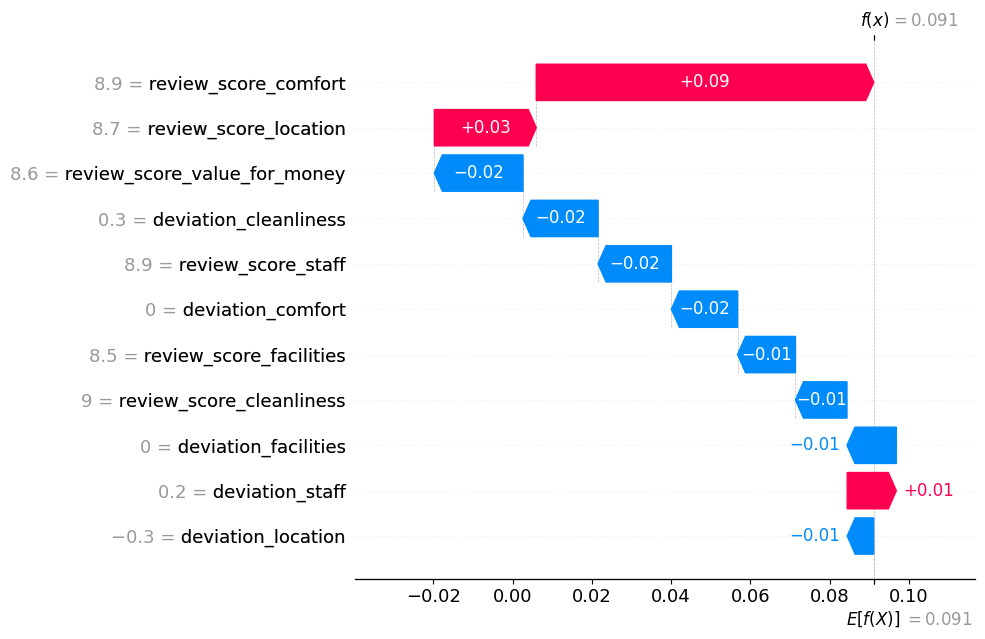

In [116]:
# Select sample index (must be between 0 and 99 since sample_size=100)
i = 10

# Get prediction
pred_class = rf_model.predict(X_test_sample.iloc[[i]])[0]
pred_name = label_encoder.classes_[pred_class]

print(f"Sample {i}: Predicted as '{pred_name}' (class index: {pred_class})")

# Create SHAP Explanation object for waterfall plot
explanation = shap.Explanation(
    values=shap_values[pred_class][i],
    base_values=explainer.expected_value[pred_class],
    data=X_test_sample.iloc[i].values,
    feature_names=X_test_sample.columns.tolist()
)

# Display waterfall plot (easier to read than force plot)
shap.waterfall_plot(explanation, max_display=15)

#### SHAP Waterfall Plot - Local Explanation for Sample 10

The SHAP waterfall plot above provides a **detailed explanation of how individual features contributed to predicting Sample 10 as 'North_America_Mexico' (class index: 5)**.

#### How to Read This Plot:

- **Base value (f(x) = 0.091)**: The average model output for this class across all training samples
- **Final prediction (f(x) = 0.091)**: The model's output for this specific sample (shown at top right)
- **Red bars**: Features that **push the prediction higher** (increase probability of Mexico)
- **Blue bars**: Features that **push the prediction lower** (decrease probability of Mexico)
- **Numbers on bars**: SHAP values indicating the magnitude of each feature's contribution

---

#### Feature Contributions Analysis:

**Top Positive Contributors (Pushing toward Mexico):**

1. **review_score_comfort = 8.9 (+0.09)** - The strongest positive signal. A comfort score of 8.9 strongly suggests this hotel is in Mexico, likely because Mexican hotels in the dataset tend to receive similar comfort ratings.

2. **review_score_location = 8.7 (+0.03)** - The location score of 8.7 moderately increases the Mexico prediction, indicating this rating pattern aligns with typical Mexican hotels.

3. **deviation_staff = 0.2 (+0.01)** - A small positive deviation in staff ratings (user rated 0.2 points higher than hotel baseline) slightly supports the Mexico prediction.

**Top Negative Contributors (Pushing away from Mexico):**

1. **deviation_facilities = 0 (-0.01)** - Zero deviation in facilities (user rating matches baseline exactly) slightly decreases the Mexico prediction, suggesting Mexican hotels typically show some deviation.

2. **deviation_location = -0.3 (-0.01)** - The user rated location 0.3 points **below** the hotel baseline, which slightly contradicts the Mexico prediction pattern.

3. **review_score_cleanliness = 9 (-0.01)** - A cleanliness score of 9 (very high) slightly pushes away from Mexico, possibly because Mexican hotels in the dataset tend to have slightly different cleanliness score distributions.

**Minimal Impact Features:**

- **review_score_value_for_money = 9.6 (-0.02)**
- **deviation_cleanliness = 0.3 (-0.02)**
- **review_score_staff = 8.9 (-0.02)**
- **deviation_comfort = 0 (-0.02)**
- **review_score_facilities = 8.5 (-0.01)**

These features have very small negative contributions, indicating they don't strongly align with typical Mexican hotel patterns but aren't strong enough to override the positive signals.

---

#### Key Insights:

1. **Comfort Dominates**: The comfort score of 8.9 is the single most important factor driving this prediction toward Mexico, contributing +0.09 to the output.

2. **Balanced Prediction**: Despite comfort and location pushing strongly toward Mexico, multiple other features (facilities, cleanliness, staff) push slightly against it. The net effect is a positive but not overwhelming prediction.

3. **Deviation Features Show Mixed Signals**: 
   - Small positive staff deviation supports Mexico
   - Zero facility deviation and negative location deviation oppose Mexico
   - This suggests user experience relative to baseline is moderately predictive

4. **High Overall Scores**: This sample has generally high review scores (8.5-9.6 range), indicating a well-rated hotel. The model distinguishes Mexico not just by high scores but by the **specific pattern** of these scores.

5. **Prediction Confidence**: The final output (f(x) = 0.091) suggests **moderate confidence** in the Mexico prediction. The model sees signals for Mexico but isn't extremely certain, likely because some features contradict the prediction.

---

#### Model Behavior:

This waterfall plot demonstrates that the Random Forest model:
- Focuses primarily on **comfort and location** scores for identifying Mexican hotels
- Uses deviation features as **secondary signals** to refine predictions
- Makes decisions based on **score patterns** rather than absolute values
- Considers the **interaction** of multiple features, balancing positive and negative evidence

**Why Mexico?** The specific combination of comfort score (8.9), location score (8.7), and small staff deviation (0.2) creates a signature pattern that the model has learned to associate with hotels in Mexico.

## 8.2 - LIME Analysis

**What is LIME?**
- Local Interpretable Model-agnostic Explanations.
- Creates simple, interpretable models (linear) to explain individual predictions.



In [117]:
# Install LIME
%pip install lime
import lime
import lime.lime_tabular

# Initialize LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,              # Training data to understand feature distributions
    feature_names=X_train.columns.tolist(),    # Feature names for readable output
    class_names=label_encoder.classes_.tolist(),  # All 11 country group names
    mode='classification',                      # Classification task
    random_state=42                             # For reproducibility
)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 8.2.1 - LIME Explanations for Individual Samples

Explaining the same samples we used for SHAP to compare both methods.

In [118]:
from IPython.display import HTML, display

# Sample to explain
sample_index = 17

# Get prediction info
pred_class = rf_model.predict(X_test.iloc[[sample_index]])[0]
pred_name = label_encoder.classes_[pred_class]

print(f"Sample {sample_index}: Predicted as '{pred_name}'")

# Generate LIME explanation
explanation = explainer_lime.explain_instance(
    data_row=X_test.iloc[sample_index].values,
    predict_fn=rf_model.predict_proba,
    num_features=10
)

# Display as HTML (more reliable)
display(HTML(explanation.as_html()))

Sample 17: Predicted as 'Western_Europe'


c:\Users\moham\OneDrive\Documents\GUC\Semester 9\ACL\Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### LIME Explanation - Local Interpretation for Sample 17

The LIME (Local Interpretable Model-agnostic Explanations) plot above explains **why Sample 17 was predicted as 'Western_Europe'** by showing which features support or oppose this prediction.

#### How to Read This Plot:

- **Left side (NOT East_Asia)**: Features that push the prediction **away from East_Asia** (supporting Western_Europe)
- **Right side (East_Asia)**: Features that push the prediction **toward East_Asia** (opposing Western_Europe)
- **Orange/Red bars**: Features supporting the displayed class label
- **Teal/Blue bars**: Features opposing the displayed class label
- **Feature conditions**: Show the actual values or ranges for each feature (e.g., `<= -0.40`)

---

#### Prediction Probabilities:

The model's confidence distribution for Sample 17:

| Country Group | Probability |
|---------------|-------------|
| **Western_Europe** | **36%** ✓ (Predicted) |
| Africa | 24% |
| Southeast_Asia | 16% |
| Other | 16% |
| East_Asia | 8% |

**Key Observation**: The model predicts Western_Europe with **36% confidence** - the highest probability but not overwhelming. This indicates moderate certainty with significant competition from other classes (especially Africa at 24%).

---

#### Features Supporting Western_Europe (Left Side - NOT East_Asia):

1. **review_score_location (0.08)** - The location score strongly distinguishes this hotel from East Asian properties, suggesting Western European hotels have different location rating patterns.

2. **review_score_staff (0.07)** - Staff ratings provide moderate evidence against East_Asia, indicating this score aligns more with Western European service standards.

3. **review_score_facilities (0.07)** - Facilities score moderately opposes East_Asia classification, suggesting facility patterns differ between regions.

4. **deviation_staff <= -0.40 (0.06)** - The user rated staff **significantly below** the hotel baseline (by at least 0.4 points). This large negative deviation is characteristic of Western European hotels in the dataset.

5. **deviation_facilities <= ... (0.04)** - Negative facility deviation also supports Western_Europe over East_Asia.

6. **8.70 < review_score_cleanliness (0.02)** - A cleanliness score above 8.70 slightly favors Western_Europe, suggesting these hotels maintain high cleanliness standards.

---

#### Features Supporting East_Asia (Right Side):

1. **user_traveller_type_Family (0.03)** - Being a family traveler slightly increases East_Asia probability, possibly because families in the dataset more frequently review East Asian hotels.

2. **-0.10 < deviation_location <= 0.01** - A small negative to near-zero location deviation (user rating close to baseline) slightly favors East_Asia.

3. **-0.40 < deviation_cleanliness <= 0.01** - Similarly, cleanliness deviation near zero slightly supports East_Asia.

4. **0.00 < deviation_value_for_money (0.00)** - Minimal impact, but positive value-for-money deviation very slightly favors East_Asia.

---

#### Key Insights:

1. **Staff and Facilities Matter Most**: The strongest signals come from review scores for location, staff, and facilities. These dimensions show clear regional patterns that LIME identified.

2. **Negative Deviations Drive Western_Europe Prediction**: 
   - `deviation_staff <= -0.40` is a critical feature
   - Users rating **below** hotel baseline for staff and facilities is characteristic of Western European properties
   - This suggests Western European hotels may have higher baseline standards that users find harder to exceed

3. **LIME vs SHAP Comparison**:
   - LIME focuses on **specific value thresholds** (e.g., `<= -0.40`, `> 8.70`)
   - SHAP shows **continuous contributions** across all values
   - Both methods identify review scores and deviations as most important

4. **Moderate Confidence Explained**: 
   - The 36% Western_Europe probability makes sense given:
     - Strong evidence from staff/facilities deviations
     - But competition from Africa (24%) suggests overlapping patterns
     - Some features (traveler type, small deviations) slightly favor other regions

5. **User Demographics Have Minimal Impact**: Only `user_traveller_type_Family` appears with very small contribution (0.03), confirming that user characteristics are far less important than hotel review patterns.

---

#### Model Behavior:

This LIME explanation reveals that the model:

- **Distinguishes regions by review score patterns**: Location, staff, and facilities scores create regional signatures
- **Uses deviation thresholds**: Large negative deviations (especially staff <= -0.40) are strong regional indicators
- **Makes probabilistic decisions**: The 36% confidence reflects competing evidence from multiple country groups
- **Learns regional service standards**: Western European hotels appear to have higher baseline expectations that users rate more critically

**Why Western_Europe?** The combination of specific review score levels (especially location and staff) paired with **negative deviations** in staff and facilities creates a pattern the model associates with Western European hotels. The user rated the hotel **below its baseline** in key dimensions, which is characteristic of the region's hospitality standards.

---

# Section 9: Inference Function

**Objective:** Create a function that accepts raw input and returns the model prediction in natural language.

## 9.1 - Define Inference Function

In [119]:

def predict_country_group(
    # User demographics
    user_gender,           # 'Male', 'Female', or 'Other'
    user_age_group,        # '18-24', '25-34', '35-44', '45-54', '55+'
    user_traveller_type,   # 'Business', 'Couple', 'Family', 'Solo'

    # Review scores (0-10 scale)
    review_score_cleanliness,
    review_score_comfort,
    review_score_facilities,
    review_score_location,
    review_score_staff,
    review_score_value_for_money,

    # Hotel baseline scores (0-10 scale)
    hotel_cleanliness_base,
    hotel_comfort_base,
    hotel_facilities_base,
    hotel_location_base,
    hotel_staff_base,
    hotel_value_for_money_base
):

    # Step 1: Create input dataframe with raw features
    input_data = pd.DataFrame({
        'user_gender': [user_gender],
        'user_age_group': [user_age_group],
        'user_traveller_type': [user_traveller_type],
        'review_score_cleanliness': [review_score_cleanliness],
        'review_score_comfort': [review_score_comfort],
        'review_score_facilities': [review_score_facilities],
        'review_score_location': [review_score_location],
        'review_score_staff': [review_score_staff],
        'review_score_value_for_money': [review_score_value_for_money]
    })

    # Step 2: Feature Engineering - Calculate deviation features
    input_data['deviation_cleanliness'] = review_score_cleanliness - hotel_cleanliness_base
    input_data['deviation_comfort'] = review_score_comfort - hotel_comfort_base
    input_data['deviation_facilities'] = review_score_facilities - hotel_facilities_base
    input_data['deviation_location'] = review_score_location - hotel_location_base
    input_data['deviation_staff'] = review_score_staff - hotel_staff_base
    input_data['deviation_value_for_money'] = review_score_value_for_money - hotel_value_for_money_base

    # Step 3: One-hot encoding for categorical features
    input_encoded = pd.get_dummies(
        input_data,
        columns=['user_gender', 'user_age_group', 'user_traveller_type'],
        drop_first=True
    )

    # Step 4: Ensure all columns match training data
    for col in X_train.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    # Reorder columns to match training data
    input_encoded = input_encoded[X_train.columns]

    # Step 5: Make prediction
    prediction = rf_model.predict(input_encoded)[0]
    prediction_proba = rf_model.predict_proba(input_encoded)[0]

    # Step 6: Get prediction details
    predicted_group = label_encoder.classes_[prediction]
    confidence = prediction_proba[prediction] * 100

    # Step 7: Create country group to countries mapping for explanation
    country_group_map = {
        'North_America': 'North America (United States, Canada)',
        'Western_Europe': 'Western Europe (Germany, France, UK, Netherlands, Spain, Italy)',
        'Eastern_Europe': 'Eastern Europe (Russia)',
        'East_Asia': 'East Asia (China, Japan, South Korea)',
        'Southeast_Asia': 'Southeast Asia (Thailand, Singapore)',
        'Middle_East': 'Middle East (United Arab Emirates, Turkey)',
        'Africa': 'Africa (Egypt, Nigeria, South Africa)',
        'Oceania': 'Oceania (Australia, New Zealand)',
        'South_America': 'South America (Brazil, Argentina)',
        'South_Asia': 'South Asia (India)',
        'North_America_Mexico': 'Mexico'
    }

    # Step 8: Generate explanation
    explanation = f"Based on the user profile ({user_gender}, {user_age_group}, {user_traveller_type}) "
    explanation += f"and review scores, this hotel is most likely located in "
    explanation += f"{country_group_map.get(predicted_group, predicted_group)}."

    # Return comprehensive result
    return {
        'predicted_group': predicted_group,
        'predicted_region': country_group_map.get(predicted_group, predicted_group),
        'confidence': round(confidence, 2),
        'explanation': explanation
    }

## 9.2 - Test Inference Function

Testing the inference function with different user profiles and scenarios.

In [120]:
# Scenario 1: Young couple on vacation with high ratings
print("Scenario 1: Young Couple - High Satisfaction")

result1 = predict_country_group(
    # User demographics
    user_gender='Female',
    user_age_group='25-34',
    user_traveller_type='Couple',

    # Review scores (high ratings)
    review_score_cleanliness=9.5,
    review_score_comfort=9.0,
    review_score_facilities=8.5,
    review_score_location=9.5,
    review_score_staff=9.0,
    review_score_value_for_money=8.0,

    # Hotel baseline scores (average)
    hotel_cleanliness_base=8.0,
    hotel_comfort_base=8.0,
    hotel_facilities_base=7.5,
    hotel_location_base=8.5,
    hotel_staff_base=8.0,
    hotel_value_for_money_base=7.5
)

print(f"\nPrediction: {result1['predicted_group']}")
print(f"Region: {result1['predicted_region']}")
print(f"\n{result1['explanation']}")

Scenario 1: Young Couple - High Satisfaction

Prediction: Africa
Region: Africa (Egypt, Nigeria, South Africa)

Based on the user profile (Female, 25-34, Couple) and review scores, this hotel is most likely located in Africa (Egypt, Nigeria, South Africa).


In [121]:
# Scenario 2: Business traveler with mixed reviews
print("Scenario 2: Business Traveler - Mixed Experience")

result2 = predict_country_group(
    # User demographics
    user_gender='Male',
    user_age_group='35-44',
    user_traveller_type='Business',

    # Review scores (mixed - some below baseline)
    review_score_cleanliness=7.0,
    review_score_comfort=8.0,
    review_score_facilities=6.5,
    review_score_location=9.0,
    review_score_staff=7.5,
    review_score_value_for_money=6.0,

    # Hotel baseline scores
    hotel_cleanliness_base=8.5,
    hotel_comfort_base=8.0,
    hotel_facilities_base=7.5,
    hotel_location_base=8.0,
    hotel_staff_base=8.5,
    hotel_value_for_money_base=7.0
)

print(f"\nPrediction: {result2['predicted_group']}")
print(f"Region: {result2['predicted_region']}")
print(f"\n{result2['explanation']}")

Scenario 2: Business Traveler - Mixed Experience

Prediction: Africa
Region: Africa (Egypt, Nigeria, South Africa)

Based on the user profile (Male, 35-44, Business) and review scores, this hotel is most likely located in Africa (Egypt, Nigeria, South Africa).


In [122]:
# Scenario 3: Family vacation with budget concerns
print("Scenario 3: Family Travelers - Budget-Conscious")

result3 = predict_country_group(
    # User demographics
    user_gender='Female',
    user_age_group='45-54',
    user_traveller_type='Family',

    # Review scores (good value for money emphasis)
    review_score_cleanliness=8.0,
    review_score_comfort=7.5,
    review_score_facilities=8.0,
    review_score_location=7.0,
    review_score_staff=9.0,
    review_score_value_for_money=9.5,

    # Hotel baseline scores
    hotel_cleanliness_base=7.5,
    hotel_comfort_base=7.0,
    hotel_facilities_base=7.5,
    hotel_location_base=7.5,
    hotel_staff_base=8.0,
    hotel_value_for_money_base=8.0
)

print(f"\nPrediction: {result3['predicted_group']}")
print(f"Region: {result3['predicted_region']}")
print(f"\n{result3['explanation']}")


Scenario 3: Family Travelers - Budget-Conscious

Prediction: Africa
Region: Africa (Egypt, Nigeria, South Africa)

Based on the user profile (Female, 45-54, Family) and review scores, this hotel is most likely located in Africa (Egypt, Nigeria, South Africa).


***See you next milestone!***